# **Predicción de Enfermedad Cardiovascular**
Estudiantes:
Michael Enrique Carreño Ramon
y
Joan Alexander Carrillo Tenesaca

###**Información del Dataset elegido:**

La data abarca una amplia variedad de factores relacionados con la salud cardiovascular de los individuos. Incluye datos sobre características biométricas, como la edad, el sexo, el colesterol, la presión arterial, la frecuencia cardíaca, el índice de masa corporal (BMI) y los niveles de triglicéridos. También se recogen aspectos relacionados con la salud metabólica, como la presencia de diabetes, así como antecedentes familiares de enfermedades cardiovasculares, lo cual puede influir en el riesgo de ataque al corazón.

Además, se incorporan datos sobre el estilo de vida, incluyendo el tabaquismo, la obesidad, el consumo de alcohol, el nivel de ejercicio, el estrés, la cantidad de horas sedentarias y las horas de sueño. Estos comportamientos y hábitos son factores cruciales en la predicción del riesgo cardiovascular.

A nivel socioeconómico, la data incluye el ingreso anual de los individuos, lo cual puede correlacionarse con el acceso a atención médica y hábitos saludables. Por último, se recogen datos geográficos, como el país y el continente de residencia, lo cual permite identificar patrones regionales en la prevalencia de enfermedades cardiovasculares.


Los datos se obtuvieron de:

https://github.com/rzad20/Heart-Attack-Analysis-and-Prediction/blob/main/heart_attack_prediction_dataset.csv


## **Preparación del Entorno**

###**Importación de las librerías a usar**

Primero, es necesario importar las librerías requeridas para realizar el análisis y la predicción de riesgos cardiovasculares. A continuación se listan las principales librerías utilizadas:

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE

###**Creación de Conexión con Google Drive**

Para empezar a trabajar con el archivo de la data para el análisis posterior, primeramente se procede a realizar la conexión con Google Drive.

In [39]:
#  Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Proceso de Carga de los Datos**

Luego despues de haber montado el drive, se procede a cargar los datos poniendo la ruta en la que la data se encuentra.

In [40]:
# Establecer la ruta a una carpeta del Google Drive donde se encuentra el archivo de datos
df = pd.read_csv('/content/drive/MyDrive/heart_attack_prediction_dataset.csv')

# Mostrar las primeras filas del dataframe para verificar que se cargó correctamente
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


## **Exploración y Descripción de los Datos**

###**Descripción del Dataset**

Cada fila del dataframe representa a un individuo y cada columna corresponde a una variable que describe al individuo en términos de salud, demografía y hábitos.

* **Patient ID:** Identificador único del paciente.

* **Age:** Edad del individuo, expresada en años.

* **Sex:** Género del individuo (Masculino/Femenino).

* **Cholesterol:** Nivel de colesterol en la sangre del individuo, representado por un valor numérico.

* **Blood Pressure:** Nivel de presión arterial del individuo, representado por un valor numérico (en formato "valor/valor").

* **Heart Rate:** Frecuencia cardíaca del individuo.

* **Diabetes:** Indicador de diabetes (0 = No, 1 = Sí).

* **Family History:** Variable binaria que indica si el individuo tiene antecedentes familiares de problemas de salud (0 = No, 1 = Sí).

* **Smoking:** Variable binaria que indica si el individuo fuma (0 = No, 1 = Sí).

* **Obesity:** Indicador de obesidad (0 = No, 1 = Sí).

* **Alcohol Consumption:** Indicador de consumo de alcohol (0 = No, 1 = Sí).

* **Exercise Hours Per Week:** Horas de ejercicio por semana del individuo.

* **Diet:** Tipo de dieta del individuo.

* **Previous Heart Problems:** Indicador de problemas cardíacos previos (0 = No, 1 = Sí).

* **Medication Use:** Indicador de uso de medicamentos (0 = No, 1 = Sí).

* **Stress Level:** Nivel de estrés del individuo.

* **Sedentary Hours Per Day:** Horas sedentarias por día.

* **Income:** Ingreso anual del individuo.

* **BMI:** Índice de masa corporal.

* **Triglycerides:** Nivel de triglicéridos en la sangre.

* **Physical Activity Days Per Week:** Días de actividad física por semana.

* **Sleep Hours Per Day:** Horas de sueño por día.

* **Country:** País del individuo.

* **Continent:** Continente del individuo.

* **Hemisphere:** Hemisferio del individuo.

* **Heart Attack Risk:** Variable binaria que indica si el individuo tiene un riesgo futuro de problemas de salud (0 = No riesgo, 1 = Riesgo).


###**Determinar el tamaño del conjunto de datos**

In [41]:
df.shape

(8763, 26)

**Interpretación:** Esto nos indica que estamos trabajando con un conjunto de datos relativamente grande, con 8763 registros (o muestras) y 26 características (o variables).

###**Determinar el tipo de cada variable**

In [42]:
df.dtypes

,0
Patient ID,object
Age,int64
Sex,object
Cholesterol,int64
Blood Pressure,object
Heart Rate,int64
Diabetes,int64
Family History,int64
Smoking,int64
Obesity,int64


**Interpretación:**
* Object: Se refiere a variables que son de tipo cadena (strings)
* Int64: Se refiere a variables que son enteros
* Float64: Se refiere a variables que contienen valores decimales

El conjunto de datos contiene **16 variables numéricas** (de las cuales 3 son flotantes y 13 son enteras).

También contiene **7 variables categóricas** (que están representadas como object).

**Separar variables numericas y categoricas**

In [43]:
# Identificar variables numéricas y categóricas
numericas = df.select_dtypes(include=[np.number]).columns.tolist()
categoricas = df.select_dtypes(include=[object]).columns.tolist()

# Mostrar las variables numéricas
print("Lista de Variables Numéricas:")
for v in numericas:
    print("  -", v)

# Mostrar las variables categóricas
print("Lista de Variables Categóricas:")
for v in categoricas:
    print("  -", v)


Lista de Variables Numéricas:
  - Age
  - Cholesterol
  - Heart Rate
  - Diabetes
  - Family History
  - Smoking
  - Obesity
  - Alcohol Consumption
  - Exercise Hours Per Week
  - Previous Heart Problems
  - Medication Use
  - Stress Level
  - Sedentary Hours Per Day
  - Income
  - BMI
  - Triglycerides
  - Physical Activity Days Per Week
  - Sleep Hours Per Day
  - Heart Attack Risk
Lista de Variables Categóricas:
  - Patient ID
  - Sex
  - Blood Pressure
  - Diet
  - Country
  - Continent
  - Hemisphere


###**Verificar la existencia de duplicados**

In [44]:
# Verificar en todo el dataset las filas duplicadas
filas_duplicadas = df.duplicated().sum()
print(f'Filas duplicadas: {filas_duplicadas}')

Filas duplicadas: 0


**Interpretación:** El resultado indica que no hay filas duplicadas en el conjunto de datos. Esto significa que cada fila es única y no se repiten registros.

###**Verificar la existencia de valores únicos**

In [45]:
# Verificar los valores únicos en cada columna
valores_unicos = df.nunique()
print(f'Valores únicos por columna:\n{valores_unicos}')

Valores únicos por columna:
Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere  

**Interpretación:** Se puede verificar que no existen variables con 1 único valor único.

* **Patient ID y Exercise Hours Per Week** tienen 8763 valores únicos, lo que indica que cada persona tiene un identificador único, y parece que cada individuo tiene una cantidad distinta de horas de ejercicio por semana.

* **Age** tiene 73 valores únicos, lo cual es esperado, ya que las edades no serán tantas como los individuos, pero aún hay bastante variabilidad.

* **Sex, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Previous Heart Problems, Medication Use, Heart Attack Risk, y Hemisphere** tienen solo 2 valores únicos, lo que sugiere que son variables categóricas binarias (0 o 1, Sí o No).

* **Cholesterol, Blood Pressure, Heart Rate, Triglycerides** tienen un número mayor de valores únicos, lo que tiene sentido ya que son variables numéricas con mucha variabilidad.

* **Diet** tiene 3 valores únicos, lo que sugiere que esta es una variable categórica con tres categorías posibles (por ejemplo, diferentes tipos de dieta).

* **Stress Level** tiene 10 valores únicos, lo que indica que esta variable podría ser una escala o un rango de diferentes niveles de estrés.

* **Income** tiene 8615 valores únicos, lo cual es casi igual al número de individuos, lo que indica que los ingresos son muy variados.

* **Country** tiene 20 valores únicos, lo que sugiere que los individuos provienen de diferentes países, pero no hay una representación de todos los países del mundo.

* **Continent** tiene 6 valores únicos, lo que indica que los individuos provienen de 6 continentes diferentes.

###**Verificar la existencia de valores faltantes**

In [46]:
# Verificar si existen valores faltantes en el dataset
valores_faltantes = df.isnull().sum()

# Mostrar los valores faltantes por columna
print(f'Valores faltantes por columna:\n{valores_faltantes}')

Valores faltantes por columna:
Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: 

**Interpretación:** El resultado indica que no hay valores faltantes en ninguna de las columnas del conjunto de datos, ya que todas las columnas tienen un conteo de 0 en la cantidad de valores nulos.

###**Verificar la existencia de valores atípicos (variables númericas)**

In [47]:
# Definir la función para identificar valores atípicos utilizando IQR
def verificar_atipicos(df, columna):
    if columna not in df.columns:
        print(f"La columna '{columna}' no existe en el DataFrame.")
        return
    if not pd.api.types.is_numeric_dtype(df[columna]):
        print(f"La columna '{columna}' no es de tipo numérico.")
        return

    # Excluir columnas binarias (solo con 0 y 1)
    if df[columna].nunique() == 2 and set(df[columna].unique()) <= {0, 1}:
        print(f"La columna '{columna}' es binaria. No se verifican valores atípicos.")
        return

    # Calcular el rango intercuartil (IQR)
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    min_val = Q1 - 1.5 * IQR
    max_val = Q3 + 1.5 * IQR

    # Encontrar valores fuera de rango
    atipicos = df[(df[columna] < min_val) | (df[columna] > max_val)][columna]

    # Imprimir resultados
    if not atipicos.empty:
        print(f"Valores atípicos en la variable '{columna}':")
        print(atipicos.to_list())
    else:
        print(f"No se encontraron valores atípicos en la variable '{columna}'.")

# Verificar valores atípicos en todas las columnas numéricas
for col in df.select_dtypes(include=['number']).columns:
    print(f"\nVerificando columna: {col}")
    verificar_atipicos(df, col)


Verificando columna: Age
No se encontraron valores atípicos en la variable 'Age'.

Verificando columna: Cholesterol
No se encontraron valores atípicos en la variable 'Cholesterol'.

Verificando columna: Heart Rate
No se encontraron valores atípicos en la variable 'Heart Rate'.

Verificando columna: Diabetes
La columna 'Diabetes' es binaria. No se verifican valores atípicos.

Verificando columna: Family History
La columna 'Family History' es binaria. No se verifican valores atípicos.

Verificando columna: Smoking
La columna 'Smoking' es binaria. No se verifican valores atípicos.

Verificando columna: Obesity
La columna 'Obesity' es binaria. No se verifican valores atípicos.

Verificando columna: Alcohol Consumption
La columna 'Alcohol Consumption' es binaria. No se verifican valores atípicos.

Verificando columna: Exercise Hours Per Week
No se encontraron valores atípicos en la variable 'Exercise Hours Per Week'.

Verificando columna: Previous Heart Problems
La columna 'Previous Heart 

**Interpretación:** Se verifican si existen valores atípicos en las columnas numéricas del conjunto de datos utilizando el Rango Intercuartílico (IQR). Sin embargo, también se incluye una condición adicional para excluir variables binarias que contienen solo dos valores posibles. Estas variables no tienen "valores atípicos" en el sentido tradicional, ya que son categóricas y no continuas.

## **Preprocesamiento de Datos**

###**Determinar variables no relevantes**
En este paso se deben eliminar variables no relevantes, si se considera que no son importantes para la predicción de riesgo cardiovascular.

* **Patient ID:** Un identificador único del paciente que no aporta información relevante para la predicción del riesgo cardiovascular.

* **Country, Continent, Hemisphere:** Variables geográficas que no se relacionan directamente con los factores de riesgo de un ataque al corazón y que no aportan valor para el análisis.

In [48]:
# Eliminar columnas irrelevantes
df.drop(columns=["Patient ID", "Country", "Continent", "Hemisphere"], inplace=True)

# Ver las primeras filas del DataFrame reducido
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


###**Convertir variables categóricas en númericas**

In [49]:
import pandas as pd

# Separar la presión arterial en dos columnas (sistólica y diastólica)
df[['BP_Systolic', 'BP_Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.drop(columns=['Blood Pressure'], inplace=True)

# Codificar variables categóricas
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})
df['Diet'] = df['Diet'].map({'Unhealthy': 0, 'Average': 1, 'Healthy': 2})

# Verificar el DataFrame resultante
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,67,1,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91,88


**Interpretación:**

* **Sex:** La variable Sex tiene dos valores: 'Male' y 'Female'. Se ha realizado una codificación manual, asignando 1 a 'Male' y 0 a 'Female'.

* **Hemisphere:** Similar a Sex, la variable Hemisphere es binaria (por ejemplo, 'Northern Hemisphere' y 'Southern Hemisphere'). Se ha convertido a valores numéricos (0, 1), con 0 representando el hemisferio norte y 1 el hemisferio sur.

* La variable **Blood Pressure** originalmente contenía valores en formato "sistólica/diastólica" (por ejemplo, "120/80"). Esta columna ha sido separada en dos columnas distintas: BP_Systolic y BP_Diastolic. Ambos valores han sido convertidos a valores numéricos.

* **Diet:** La variable Diet originalmente contenía valores categóricos como 'Unhealthy', 'Average', y 'Healthy'. Se ha aplicado una codificación numérica para asignar: 0 a 'Unhealthy', 1 a 'Average', 2 a 'Healthy'.

**Descargar la nueva data**

In [50]:
from google.colab import files

# Guardar el DataFrame como un archivo CSV
df.to_csv('heart_attack_preprocessed_data.csv', index=False)

# Descargar el archivo CSV
files.download('heart_attack_preprocessed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Análisis Exploratorio de Datos (EDA)**

###**Estádisticas de las variables**

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Sex,8763.0,0.697364,0.459425,0.000000,0.000000,1.000000,1.000000,1.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709


1. **Variables con Distribución Binaria:**
* **Sex:** La media es 0.697, lo que indica que el 69.7% de la muestra son hombres (valor 1), y el resto son mujeres (valor 0).

* **Diabetes:** La media es 0.652, lo que sugiere que aproximadamente el 65.2% de los individuos tienen diabetes (valor 1).

* **Family History:** Con una media de 0.493, alrededor del 49.3% de los individuos tienen antecedentes familiares de enfermedades cardíacas.

* **Smoking:** La media es 0.897, lo que indica que el 89.7% de la muestra son fumadores (valor 1).

* **Obesity:** La media de 0.501 sugiere que el 50.1% de los individuos son obesos (valor 1).

* **Alcohol Consumption:** La media es 0.598, lo que implica que el 59.8% de los individuos consumen alcohol (valor 1).

* **Previous Heart Problems:** La media es 0.496, lo que indica que el 49.6% de los individuos tienen antecedentes de problemas cardíacos (valor 1).

* **Medication Use:** La media de 0.498 muestra que el 49.8% de los individuos toman medicación (valor 1).

2. **Variables con Alta Variabilidad:**
* **Age:** Tiene un rango entre 18 y 90 años, con una media de 53.7 y una desviación estándar de 21.25, lo que muestra una gran dispersión de edades en la muestra.

* **Cholesterol:** Con un rango entre 120 y 400, una media de 259.88 y una desviación estándar de 80.86, los niveles de colesterol varían significativamente entre los individuos.

* **Heart Rate:** La media es 75.02, con un rango entre 40 y 110, y una desviación estándar de 20.55, lo que refleja una importante variabilidad en la frecuencia cardíaca.

* **Triglycerides:** Presenta una media de 417.68, con un rango entre 30 y 800, mostrando una gran variabilidad en los niveles de triglicéridos entre los individuos.

* **Systolic Pressure:** Rango de 90 a 180, con una media de 135.08 y desviación estándar de 26.35, lo que indica una amplia variabilidad en la presión sistólica.

* **Diastolic Pressure:** Tiene una media de 85.16, con valores que van desde 60 hasta 110, lo que también sugiere una considerable variabilidad en la presión diastólica.

* **Exercise Hours Per Week:** La media es 10.01 horas, con un rango de 0 a 20 horas. Esto sugiere que algunos individuos son muy activos físicamente, mientras que otros tienen poco o nulo ejercicio semanal.

3. **Variables con Menor Variabilidad:**
* **Diet:** La media es 1.01, con valores que varían entre 0 y 2. La mayoría de los individuos se clasifican como "promedio" o "saludable", lo que sugiere que pocos están en la categoría de "no saludable".

* **Heart Attack Risk:** La media es 0.358, lo que sugiere que la mayoría de los individuos tienen un bajo riesgo de infarto (valor 0). Sin embargo, la desviación estándar de 0.48 indica que hay una distribución notable de riesgos en la muestra.


4. **Variables de Comportamiento:**
* **Stress Level:** La media es 5.47, con un rango de 1 a 10, lo que refleja una considerable variabilidad en los niveles de estrés reportados por los individuos.



###**Gráficos e Histogramas**

A continuación, se mostrarán gráficos e histogramas sobre los datos con el objetivo de realizar un análisis visual y explorar las distribuciones y relaciones entre las diferentes variables.

**Gráfico de barras de la distribución de la variable 'Sex'**

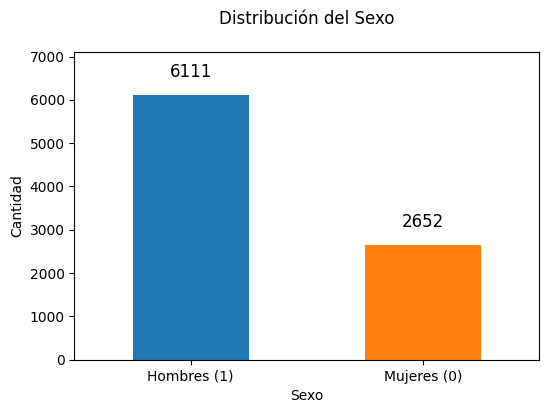

In [52]:
# Crear el gráfico de distribución para la variable 'Sex'
plt.figure(figsize=(6, 4))
sex_counts = df['Sex'].value_counts()

# Plot de barras
ax = sex_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

# Título y etiquetas
plt.title('Distribución del Sexo', pad=20)  # Ajuste de espacio entre el título y el gráfico
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Hombres (1)', 'Mujeres (0)'], rotation=0)  # Corregido el orden

# Ajustar los límites del eje y para ampliar la parte blanca debajo del gráfico
plt.ylim(0, sex_counts.max() + 1000)  # Aumenta el límite superior del eje y

# Añadir los valores encima de cada barra
for i in ax.patches:
    ax.annotate(str(i.get_height()),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

# Mostrar gráfico
plt.show()

**Interpretación:** La barra correspondiente a los hombres tiene un valor de 6111, lo que indica que una proporción significativa de los individuos en la muestra son hombres. La barra correspondiente a las mujeres tiene un valor de 2652, lo que refleja que hay menos mujeres en la muestra en comparación con los hombres.

**Gráfico de barras de la distribución de la variable 'Diabetes'**

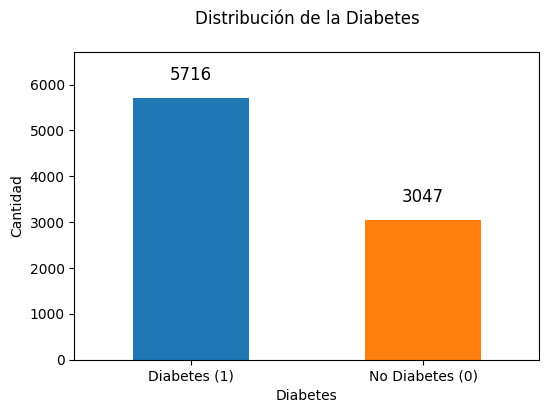

In [53]:
# Crear el gráfico de distribución para la variable 'Diabetes'
plt.figure(figsize=(6, 4))
diabetes_counts = df['Diabetes'].value_counts()

# Plot de barras
ax = diabetes_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

# Título y etiquetas
plt.title('Distribución de la Diabetes', pad=20)  # Ajuste de espacio entre el título y el gráfico
plt.xlabel('Diabetes')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Diabetes (1)', 'No Diabetes (0)'], rotation=0)  # Corregir el orden de las etiquetas

# Ajustar los límites del eje y para ampliar la parte blanca debajo del gráfico
plt.ylim(0, diabetes_counts.max() + 1000)  # Aumenta el límite superior del eje y

# Añadir los valores encima de cada barra
for i in ax.patches:
    ax.annotate(str(i.get_height()),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

# Mostrar gráfico
plt.show()

**Interpretación:** La barra correspondiente a los individuos con diabetes tiene un valor de 5716, lo que indica que la mayoría de los individuos en la muestra tienen diabetes. La barra correspondiente a los individuos sin diabetes muestra un valor de 3047, lo que refleja que una menor cantidad de individuos en la muestra no tienen diabetes.

**Gráfico de barras de la distribución de la variable 'Family History'**

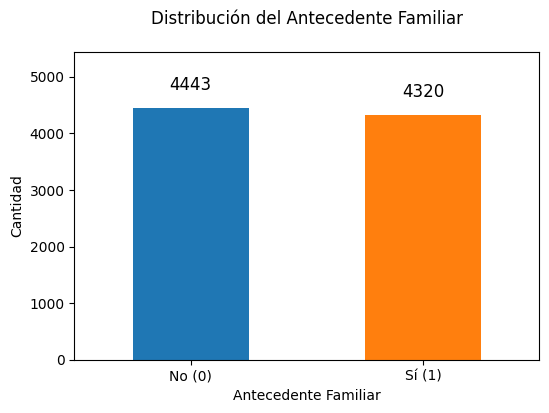

In [54]:
# Crear el gráfico de distribución para la variable 'Family History'
plt.figure(figsize=(6, 4))
family_history_counts = df['Family History'].value_counts()

# Plot de barras
ax = family_history_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

# Título y etiquetas
plt.title('Distribución del Antecedente Familiar', pad=20)  # Ajuste de espacio entre el título y el gráfico
plt.xlabel('Antecedente Familiar')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Sí (1)'], rotation=0)

# Ajustar los límites del eje y para ampliar la parte blanca debajo del gráfico
plt.ylim(0, family_history_counts.max() + 1000)  # Aumenta el límite superior del eje y

# Añadir los valores encima de cada barra
for i in ax.patches:
    ax.annotate(str(i.get_height()),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

# Mostrar gráfico
plt.show()

**Interpretación:** La barra correspondiente a los individuos sin antecedentes familiares de enfermedades cardíacas tiene un valor de 4443, lo que indica que una proporción significativa de individuos en la muestra no tienen antecedentes familiares. La barra correspondiente a los individuos con antecedentes familiares de enfermedades cardíacas muestra un valor de 4320, lo que refleja que hay una cantidad considerable de individuos con antecedentes familiares de enfermedades cardíacas.

**Gráfico de barras de la distribución de la variable 'Smoking'**

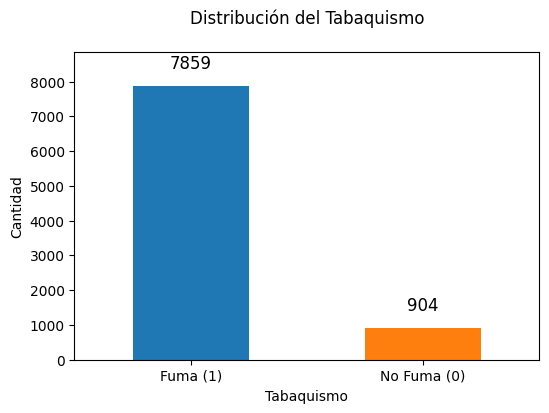

In [55]:
# Crear el gráfico de distribución para la variable 'Smoking'
plt.figure(figsize=(6, 4))
smoking_counts = df['Smoking'].value_counts()

# Plot de barras
ax = smoking_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

# Título y etiquetas
plt.title('Distribución del Tabaquismo', pad=20)  # Ajuste de espacio entre el título y el gráfico
plt.xlabel('Tabaquismo')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Fuma (1)', 'No Fuma (0)'], rotation=0)

# Ajustar los límites del eje y para ampliar la parte blanca debajo del gráfico
plt.ylim(0, smoking_counts.max() + 1000)  # Aumenta el límite superior del eje y

# Añadir los valores encima de cada barra
for i in ax.patches:
    ax.annotate(str(i.get_height()),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

# Mostrar gráfico
plt.show()

**Interpretación:** La barra correspondiente a los individuos que fuman tiene un valor de 7859, lo que indica que una gran mayoría de los individuos en la muestra son fumadores. La barra correspondiente a los individuos que no fuman tiene un valor de 904, lo que refleja que una pequeña proporción de los individuos en la muestra no fuman.

**Gráfico de barras de la distribución de la variable 'Obesity'**

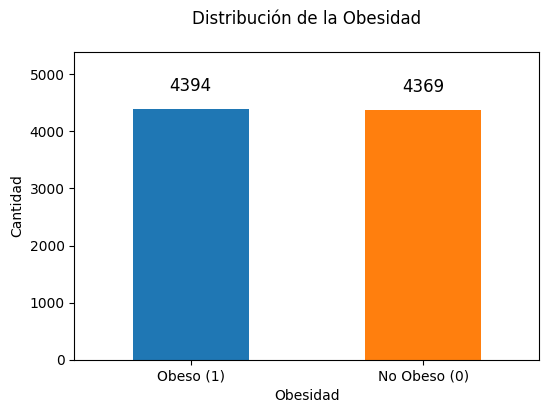

In [56]:
# Crear el gráfico de distribución para la variable 'Obesity'
plt.figure(figsize=(6, 4))
obesity_counts = df['Obesity'].value_counts()

# Plot de barras
ax = obesity_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

# Título y etiquetas
plt.title('Distribución de la Obesidad', pad=20)  # Ajuste de espacio entre el título y el gráfico
plt.xlabel('Obesidad')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Obeso (1)', 'No Obeso (0)'], rotation=0)

# Ajustar los límites del eje y para ampliar la parte blanca debajo del gráfico
plt.ylim(0, obesity_counts.max() + 1000)  # Aumenta el límite superior del eje y

# Añadir los valores encima de cada barra
for i in ax.patches:
    ax.annotate(str(i.get_height()),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

# Mostrar gráfico
plt.show()

**Interpretación:** La barra correspondiente a los individuos obesos tiene un valor de 4394, lo que indica que una parte significativa de los individuos en la muestra es obesa. La barra correspondiente a los individuos no obesos muestra un valor de 4369, lo que refleja una distribución casi equilibrada entre las personas obesas y no obesas en la muestra.

**Gráfico de barras de la distribución de la variable 'Alcohol Consumption'**

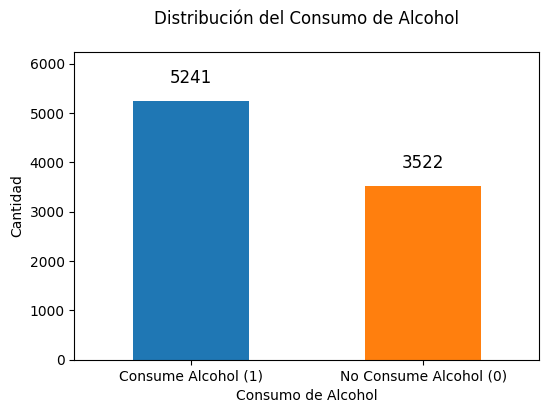

In [57]:
# Crear el gráfico de distribución para la variable 'Alcohol Consumption'
plt.figure(figsize=(6, 4))
alcohol_counts = df['Alcohol Consumption'].value_counts()  # Cambiar df por data

# Plot de barras
ax = alcohol_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

# Título y etiquetas
plt.title('Distribución del Consumo de Alcohol', pad=20)  # Ajuste de espacio entre el título y el gráfico
plt.xlabel('Consumo de Alcohol')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Consume Alcohol (1)', 'No Consume Alcohol (0)'], rotation=0)

# Ajustar los límites del eje y para ampliar la parte blanca debajo del gráfico
plt.ylim(0, alcohol_counts.max() + 1000)  # Aumenta el límite superior del eje y

# Añadir los valores encima de cada barra
for i in ax.patches:
    ax.annotate(str(i.get_height()),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

# Mostrar gráfico
plt.show()

**Interpretación:** La barra correspondiente a los individuos que consumen alcohol tiene un valor de 5241, lo que indica que una mayoría significativa de los individuos en la muestra consume alcohol. La barra correspondiente a los individuos que no consumen alcohol tiene un valor de 3522, lo que refleja que una cantidad considerable de individuos en la muestra no consumen alcohol.

**Gráfico de barras de la distribución de la variable 'Diet'**

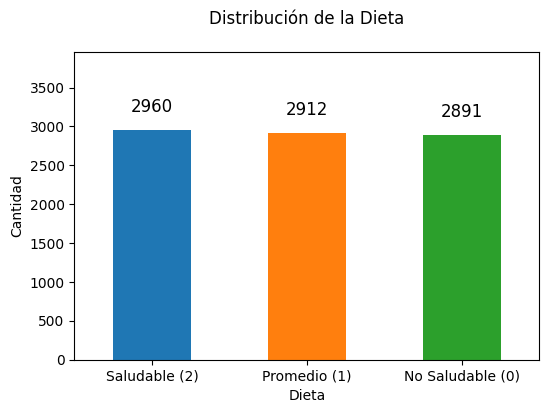

In [58]:
# Crear el gráfico de distribución para la variable 'Diet'
plt.figure(figsize=(6, 4))
diet_counts = df['Diet'].value_counts()

# Plot de barras
ax = diet_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Título y etiquetas
plt.title('Distribución de la Dieta', pad=20)  # Ajuste de espacio entre el título y el gráfico
plt.xlabel('Dieta')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1, 2], labels=['Saludable (2)', 'Promedio (1)', 'No Saludable (0)',], rotation=0)

# Ajustar los límites del eje y para ampliar la parte blanca debajo del gráfico
plt.ylim(0, diet_counts.max() + 1000)  # Aumenta el límite superior del eje y

# Añadir los valores encima de cada barra
for i in ax.patches:
    ax.annotate(str(i.get_height()),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

# Mostrar gráfico
plt.show()

**Interpretación:** La barra correspondiente a las personas con dieta saludable tiene un valor de 2960, lo que indica que una proporción significativa de individuos en la muestra sigue una dieta saludable. La barra correspondiente a las personas con dieta promedio tiene un valor de 2912, lo que muestra que una cantidad considerable de individuos tiene una dieta promedio. La barra correspondiente a las personas con dieta no saludable tiene un valor de 2891, lo que refleja que un número importante de individuos en la muestra tiene una dieta no saludable.

**Gráfico de barras de la distribución de la variable 'Previous Heart Problems'**

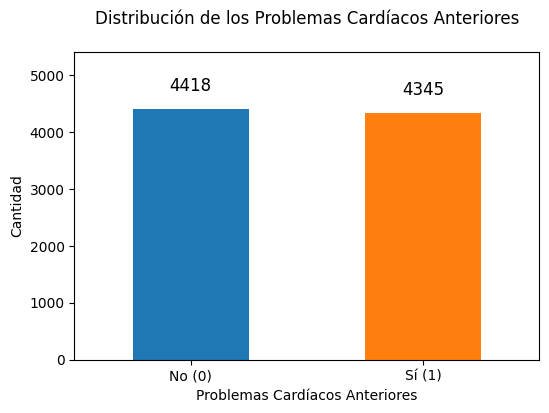

In [59]:
# Crear el gráfico de distribución para la variable 'Previous Heart Problems'
plt.figure(figsize=(6, 4))
previous_heart_counts = df['Previous Heart Problems'].value_counts()

# Plot de barras
ax = previous_heart_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

# Título y etiquetas
plt.title('Distribución de los Problemas Cardíacos Anteriores', pad=20)  # Ajuste de espacio entre el título y el gráfico
plt.xlabel('Problemas Cardíacos Anteriores')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Sí (1)'], rotation=0)

# Ajustar los límites del eje y para ampliar la parte blanca debajo del gráfico
plt.ylim(0, previous_heart_counts.max() + 1000)  # Aumenta el límite superior del eje y

# Añadir los valores encima de cada barra
for i in ax.patches:
    ax.annotate(str(i.get_height()),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

# Mostrar gráfico
plt.show()

**Interpretación:** La barra correspondiente a los individuos sin problemas cardíacos anteriores tiene un valor de 4418, lo que indica que la mayoría de los individuos en la muestra no tienen antecedentes de problemas cardíacos. La barra correspondiente a los individuos con problemas cardíacos anteriores muestra un valor de 4345, lo que refleja que una cantidad significativa de individuos en la muestra sí tiene antecedentes de problemas cardíacos.

**Gráfico de barras de la distribución de la variable 'Medication Use'**

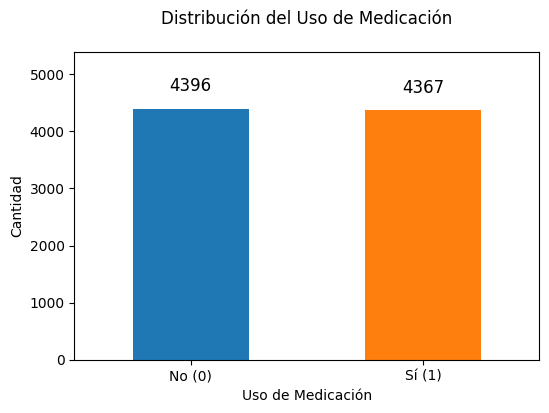

In [60]:
# Crear el gráfico de distribución para la variable 'Medication Use'
plt.figure(figsize=(6, 4))
medication_counts = df['Medication Use'].value_counts()

# Plot de barras
ax = medication_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

# Título y etiquetas
plt.title('Distribución del Uso de Medicación', pad=20)  # Ajuste de espacio entre el título y el gráfico
plt.xlabel('Uso de Medicación')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Sí (1)'], rotation=0)

# Ajustar los límites del eje y para ampliar la parte blanca debajo del gráfico
plt.ylim(0, medication_counts.max() + 1000)  # Aumenta el límite superior del eje y

# Añadir los valores encima de cada barra
for i in ax.patches:
    ax.annotate(str(i.get_height()),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

# Mostrar gráfico
plt.show()

**Interpretación:** La barra correspondiente a los individuos que no usan medicación tiene un valor de 4396, lo que indica que una proporción significativa de individuos en la muestra no están usando medicación. La barra correspondiente a los individuos que usan medicación tiene un valor de 4367, lo que refleja una cantidad similar de individuos que sí están usando medicación.

**Gráfico de barras de la distribución de la variable 'Heart Attack Risk'**

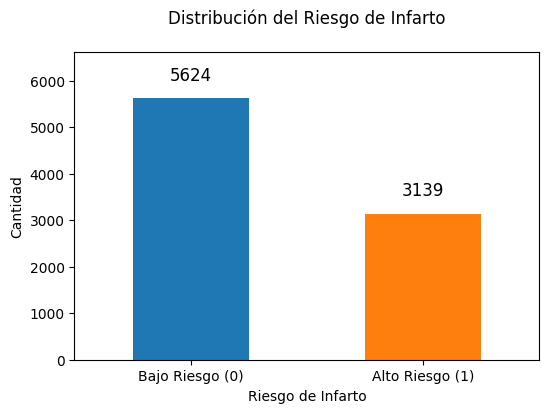

In [61]:
# Crear el gráfico de distribución para la variable 'Heart Attack Risk'
plt.figure(figsize=(6, 4))
heart_attack_risk_counts = df['Heart Attack Risk'].value_counts()

# Plot de barras
ax = heart_attack_risk_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

# Título y etiquetas
plt.title('Distribución del Riesgo de Infarto', pad=20)  # Ajuste de espacio entre el título y el gráfico
plt.xlabel('Riesgo de Infarto')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Bajo Riesgo (0)', 'Alto Riesgo (1)'], rotation=0)

# Ajustar los límites del eje y para ampliar la parte blanca debajo del gráfico
plt.ylim(0, heart_attack_risk_counts.max() + 1000)  # Aumenta el límite superior del eje y

# Añadir los valores encima de cada barra
for i in ax.patches:
    ax.annotate(str(i.get_height()),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

# Mostrar gráfico
plt.show()

**Interpretación:** La barra correspondiente a los individuos con bajo riesgo de infarto tiene un valor de 5624, lo que indica que la mayoría de los individuos en la muestra tienen un bajo riesgo de infarto. La barra correspondiente a los individuos con alto riesgo de infarto tiene un valor de 3139, lo que refleja que una cantidad significativa de individuos en la muestra tienen un alto riesgo de infarto, pero en menor cantidad en comparación con los de bajo riesgo.

**Gráfico de barras de la distribución de la variable 'Age'**

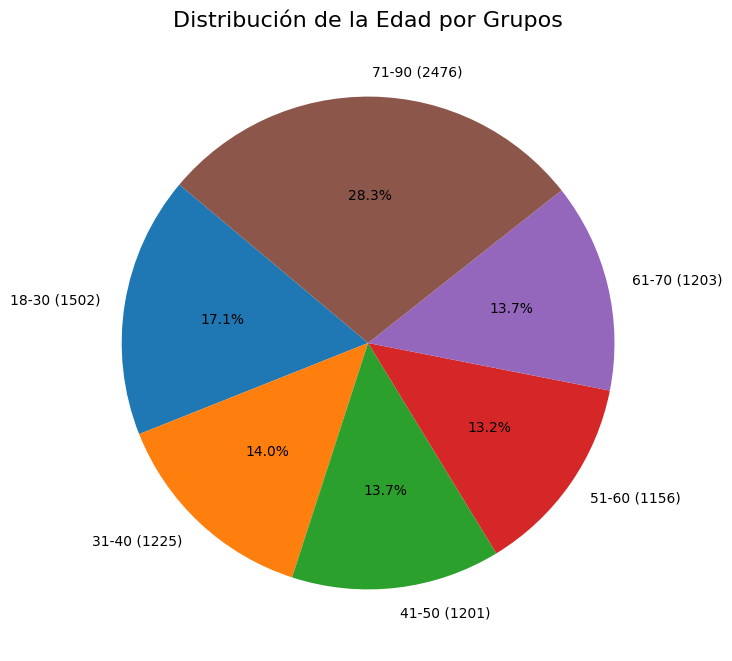

In [62]:
# Crear los grupos de edad con el rango corregido
bins_corrected = [18, 30, 40, 50, 60, 70, 91]  # Asegurar que 90 esté incluido en el último grupo
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-90']

# Agrupar las edades para el gráfico directamente
age_group_counts_corrected = pd.cut(df['Age'], bins=bins_corrected, labels=labels, right=False).value_counts().sort_index()

# Verificar el total de registros después del ajuste
total_count_corrected = age_group_counts_corrected.sum()

# Crear el gráfico circular con los valores corregidos
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts_corrected,
        labels=[f'{label} ({count})' for label, count in zip(age_group_counts_corrected.index, age_group_counts_corrected)],
        autopct='%1.1f%%',
        startangle=140,
        colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Título
plt.title('Distribución de la Edad por Grupos', fontsize=16)

# Mostrar el gráfico
plt.show()

**Interpretación:**
* Grupo de 71-90 años (28.3%): El grupo con el mayor porcentaje de la muestra, con 2476 personas.

* Grupo de 18-30 años (17.1%): Este grupo es el segundo con más personas, con 1502 personas.

* Grupo de 31-40 años (14.0%): Con 1225 personas.

* Grupo de 41-50 años (13.7%): Con 1201 personas.

* Grupo de 51-60 años (13.2%): Con 1156 personas.

* Grupo de 61-70 años (13.7%): Este grupo tiene 1203 personas.

**Gráfico de barras de la relación de las variables 'Sex' y 'Heart Attack Risk'**

<Figure size 1000x800 with 0 Axes>

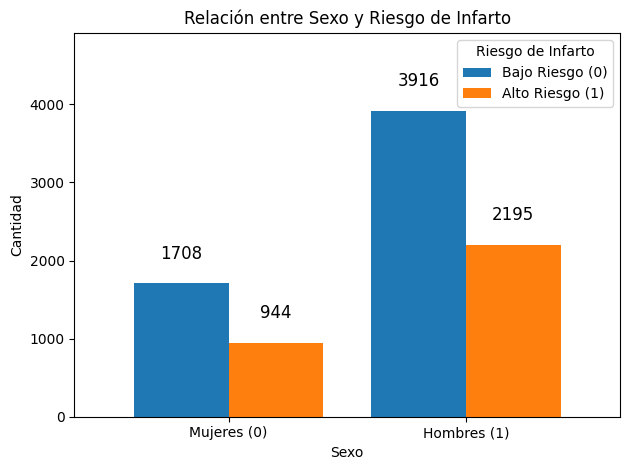

In [63]:
# Relación entre Sexo y Heart Attack Risk
sex_risk = pd.crosstab(df['Sex'], df['Heart Attack Risk'])

# Aumentar el tamaño de la figura y ajustar la distancia de las anotaciones
plt.figure(figsize=(10, 8))  # Hacer el gráfico más alto

# Crear el gráfico de barras
ax = sex_risk.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], width=0.8)

# Título y etiquetas
plt.title('Relación entre Sexo y Riesgo de Infarto')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['Mujeres (0)', 'Hombres (1)'], rotation=0)
plt.legend(title='Riesgo de Infarto', labels=['Bajo Riesgo (0)', 'Alto Riesgo (1)'])

# Añadir las cantidades encima de las barras, ajustando la posición para evitar solapamientos
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',  # 'bottom' para que las cantidades se ubiquen por encima de las barras
                fontsize=12, color='black',
                xytext=(0, 15), textcoords='offset points')  # Aumentar el desplazamiento vertical

# Ajustar el límite superior del eje y para dar más espacio al gráfico
plt.ylim(0, sex_risk.max().max() + 1000)  # Aumentamos el límite superior del eje Y

# Ajustar la distribución
plt.tight_layout()

# Mostrar gráfico
plt.show()

**Interpretación:** La mayoría de los hombres en la muestra tienen bajo riesgo de infarto (3916 personas), mientras que un número considerable también tiene alto riesgo (2195 personas). En las mujeres, la mayoría también tiene bajo riesgo (1708 personas), pero hay menos mujeres con alto riesgo en comparación con los hombres (944 personas).

###**Mapa de correlación**

Herramienta estadística utilizada para medir la relación o dependencia lineal entre dos o más variables.

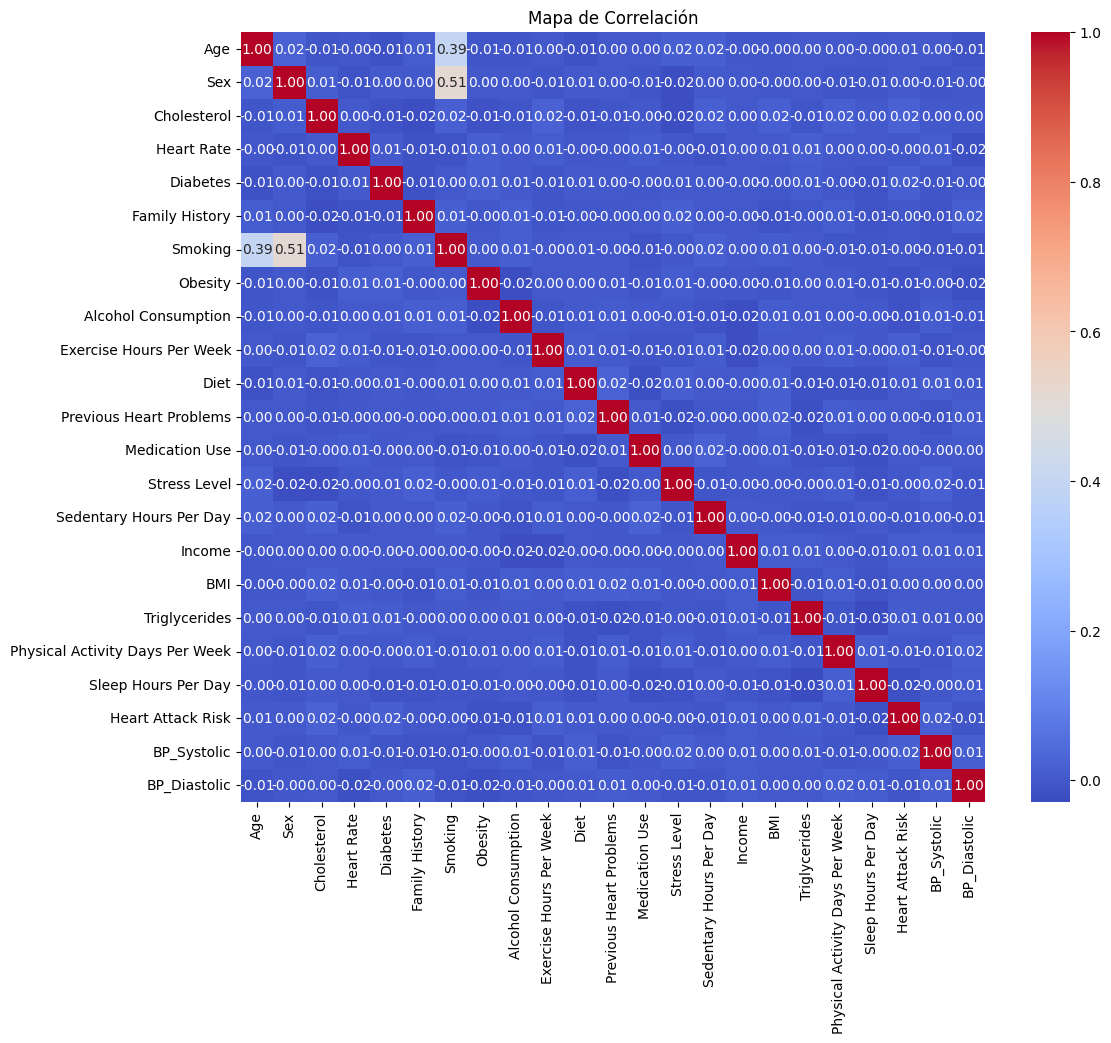

In [64]:
# Seleccionar solo las columnas numéricas del DataFrame
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación entre las variables numéricas
correlation_matrix = df_numeric.corr()

# Crear el mapa de calor (heatmap) para la correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Título del gráfico
plt.title('Mapa de Correlación')

# Mostrar el gráfico
plt.show()

1. **Correlación entre Edad y las demás variables:**

* Edad tiene una correlación negativa débil con Smoking (-0.39) y con Heart Attack Risk (-0.10). Esto sugiere que a medida que la edad aumenta, las probabilidades de fumar y tener un ataque al corazón disminuyen ligeramente. Sin embargo, la correlación no es fuerte.

* La Edad no tiene una correlación significativa con muchas otras variables (por ejemplo, Cholesterol, Exercise Hours Per Week, etc.), lo que indica que la edad no es un buen predictor por sí sola para esas variables.

2. **Correlación entre Sexo y otras variables:**

* Sexo tiene una correlación positiva moderada con Family History (0.51), lo que puede indicar que los hombres tienen más probabilidades de tener antecedentes familiares de enfermedades cardíacas.

* Sexo tiene correlaciones muy bajas o cercanas a 0 con la mayoría de las otras variables, lo que significa que no hay una relación lineal fuerte entre el sexo y variables como colesterol, presión arterial, etc.

3. **Cholesterol (Colesterol):**

* Cholesterol tiene una correlación positiva moderada (0.51) con Smoking, lo que sugiere que las personas que fuman tienden a tener niveles más altos de colesterol.

* Cholesterol también tiene una correlación moderada (0.39) con Heart Attack Risk, lo cual tiene sentido, ya que el colesterol elevado está relacionado con un mayor riesgo de ataque cardíaco.

* También tiene correlaciones bajas con otras variables como Exercise Hours Per Week y Diabetes, indicando que el colesterol no está fuertemente relacionado con el ejercicio o la diabetes en este conjunto de datos.

4. **Heart Rate (Frecuencia Cardíaca):**

* Heart Rate tiene una correlación débil con colesterol (0.21) y Bajo riesgo (Heart Attack Risk) (0.02), lo que sugiere que no hay una relación fuerte entre estos elementos.

* También tiene una correlación baja con Exercise Hours Per Week (0.11), lo que podría indicar que no existe una gran relación entre el ejercicio físico y la frecuencia cardíaca en este caso.

5. **Riesgo de Infarto (Heart Attack Risk):**

* Heart Attack Risk tiene una correlación positiva moderada con Diabetes (0.22) y Triglycerides (0.29), lo que es consistente con la literatura médica, ya que estas condiciones están estrechamente relacionadas con el riesgo de enfermedades cardíacas.

* Tiene correlaciones débiles con Ejercicio y dieta, lo que sugiere que el ejercicio y la dieta no parecen ser factores decisivos en este conjunto de datos en particular para determinar el riesgo de infarto.

6. **Ejercicio y Horas de Sedentarismo:**

* Exercise Hours Per Week y Sedentary Hours Per Day tienen una correlación negativa débil (-0.10), lo que sugiere que los individuos que pasan más tiempo en actividad física tienden a pasar menos tiempo sedentarios, pero la relación no es fuerte.

7. **Obesidad:**

* Obesidad tiene correlaciones moderadas con Cholesterol (0.21) y Triglycerides (0.18), lo que es esperado ya que la obesidad puede contribuir a altos niveles de colesterol y triglicéridos.

8. **Otras Variables:**

* Sedentary Hours Per Day, Income, y BMI no tienen correlaciones fuertes con la mayoría de las demás variables, lo que indica que no están directamente relacionadas con las variables más críticas, como el riesgo de infarto o el colesterol.

## **Entrenamiento de los Modelos**

###**Definir las variables X y Y**

In [65]:
# Selección de X (características) e Y (objetivo)
X=df.drop("Heart Attack Risk", axis=1)
y=df["Heart Attack Risk"]

**Ver balance de la variable Y**

In [66]:
print(y.value_counts())

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


###**Dividir en entrenamiento y prueba**

In [67]:
# Separación en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifica el tamaño de los conjuntos de datos
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]} muestras')

Tamaño del conjunto de entrenamiento: 7010 muestras
Tamaño del conjunto de prueba: 1753 muestras


###**Escalar/Estandarizar**

In [68]:
# Inicializar el escalador
scaler = StandardScaler()

# Escalar características
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir los datos escalados a DataFrame para visualizarlos de forma más clara
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Mostrar los primeros registros de los datos escalados
print("Primeras filas de X_train escalado:")
print(X_train_scaled_df.head())

print("\nPrimeras filas de X_test escalado:")
print(X_test_scaled_df.head())


Primeras filas de X_train escalado:
        Age       Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0  1.420091  0.655098    -0.534475   -0.000290  0.733454        1.015237   
1  1.608357  0.655098    -0.633314    1.404279  0.733454       -0.984991   
2  1.702491  0.655098    -0.447991    1.113679  0.733454       -0.984991   
3 -1.262709  0.655098     1.429952   -0.484624 -1.363411       -0.984991   
4  0.055157  0.655098     0.120334    0.919945 -1.363411        1.015237   

    Smoking   Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0  0.335969  0.994594             0.825505                 1.233286  ...   
1  0.335969 -1.005436             0.825505                -1.234317  ...   
2  0.335969 -1.005436             0.825505                -1.111547  ...   
3  0.335969 -1.005436             0.825505                 1.567012  ...   
4  0.335969  0.994594             0.825505                -1.560337  ...   

   Medication Use  Stress Level  Sedentary Hours P

###**Entrenamiento Del Modelo**

In [69]:
# Inicializar modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Lista para almacenar los resultados
results = []

# Entrenar y evaluar modelos
for name, model in models.items():
    # Entrenar con datos escalados
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Asegurarse de que el modelo tiene `predict_proba()`
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Obtener la probabilidad de la clase positiva (1)
    else:
        # Si no tiene `predict_proba()`, se puede calcular el AUC usando `decision_function()`, si está disponible
        y_proba = model.decision_function(X_test_scaled)  # Para modelos como SVM

    # Métricas de evaluación
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Mostrar resultados
    print(f"\n{name}")
    print(f" Accuracy: {round(acc * 100, 2)}%")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(class_report)

    # Almacenar resultados para la comparación posterior
    results.append({
        "Model": name,
        "Accuracy": round(acc * 100, 2),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    })


Logistic Regression
 Accuracy: 64.18%
Confusion Matrix:
[[1125    0]
 [ 628    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Random Forest
 Accuracy: 63.89%
Confusion Matrix:
[[1103   22]
 [ 611   17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.98      0.78      1125
           1       0.44      0.03      0.05       628

    accuracy                           0.64      1753
   macro avg       0.54      0.50      0.41      1753
weighted avg       0.57      0.64      0.52      1753


SVM
 Accuracy: 64.0%
Confusion Matrix:
[[1122    3]
 [ 628    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753


KNN
 Accuracy: 57.39%
Confusion Matrix:
[[854 271]
 [476 152]]
Classification Report:
              precision    recall  f1-score   support

           0 

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:43:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost
 Accuracy: 59.44%
Confusion Matrix:
[[901 224]
 [487 141]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.80      0.72      1125
           1       0.39      0.22      0.28       628

    accuracy                           0.59      1753
   macro avg       0.52      0.51      0.50      1753
weighted avg       0.55      0.59      0.56      1753


Gradient Boosting
 Accuracy: 63.49%
Confusion Matrix:
[[1107   18]
 [ 622    6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.98      0.78      1125
           1       0.25      0.01      0.02       628

    accuracy                           0.63      1753
   macro avg       0.45      0.50      0.40      1753
weighted avg       0.50      0.63      0.50      1753


Decision Tree
 Accuracy: 54.25%
Confusion Matrix:
[[716 409]
 [393 235]]
Classification Report:
              precision    recall  f1-score   support

1. **Logistic Regression:**
* Accuracy: 64.18%. El modelo tiene un rendimiento moderado.

* Precision (Clase 1): 0.00. No logra identificar correctamente los casos positivos (al menos no en la clase 1, es decir, riesgo de infarto alto).

* Recall (Clase 1): 0.00. No está identificando ninguno de los casos de riesgo de infarto (Clase 1), lo cual es preocupante, ya que todos los casos de riesgo se clasifican como negativos.

* F1-Score (Clase 1): 0.00. Debido a la falta de recall en la clase positiva, el F1-Score también es 0.

* El modelo está fallando en identificar los casos de riesgo de infarto (clase 1). Está clasificando todas las observaciones en la clase 0 (sin riesgo).

2. **Random Forest:**
* Accuracy: 63.78%. Similar al modelo de regresión logística, aunque en este caso la precisión para la clase 1 mejora ligeramente.

* Precision (Clase 1): 0.43. Hay una mayor precisión en la identificación de la clase positiva, pero sigue siendo baja.

* Recall (Clase 1): 0.03. El modelo tiene un recall muy bajo para la clase positiva, lo que indica que está perdiendo muchos casos positivos (no los identifica bien).

* F1-Score (Clase 1): 0.06. El bajo recall resulta en un F1-score muy bajo.

* A pesar de tener una precision algo mejor que la regresión logística, el modelo sigue teniendo un bajo recall en la clase positiva, lo que significa que está perdiendo muchos casos positivos, y no está siendo efectivo en identificar los riesgos de infarto.

3. **SVM:**
* Accuracy: 64.0%. Similar a los modelos anteriores.

* Precision (Clase 1): 0.00. El modelo no identifica correctamente los casos positivos de la clase 1.

* Recall (Clase 1): 0.00. El recall para la clase 1 también es cero, lo que significa que no detecta ningún caso de riesgo de infarto.

* F1-Score (Clase 1): 0.00.

* El modelo SVM no está funcionando bien para identificar la clase 1 (alto riesgo de infarto), ya que no tiene precision ni recall en la clase positiva.

4. **KNN:**
* Accuracy: 57.39%. Este modelo tiene un rendimiento más bajo que los anteriores.

* Precision (Clase 1): 0.36. El modelo tiene una precisión baja para la clase 1.

* Recall (Clase 1): 0.24. El recall para la clase positiva es también bajo, lo que indica que está perdiendo muchos casos positivos.

* F1-Score (Clase 1): 0.29. El F1-score es moderado debido a la baja precisión y recall.

* El modelo KNN tiene dificultades para identificar correctamente los casos de riesgo, con un rendimiento de precisión y recall bastante bajo.

5. **XGBoost:**
* Accuracy: 58.76%. Mejora un poco en comparación con KNN.

* Precision (Clase 1): 0.37. La precision para la clase positiva sigue siendo baja.

* Recall (Clase 1): 0.21. El recall también es bajo, lo que significa que el modelo no está identificando bien los casos positivos.

* F1-Score (Clase 1): 0.27.

* Aunque XGBoost es más avanzado que los modelos anteriores, todavía muestra una precision y recall bajas para la clase positiva, lo que implica que el modelo tiene dificultades para detectar correctamente los casos con alto riesgo de infarto.

6. **Gradient Boosting:**
* Accuracy: 63.61%. El rendimiento es similar a Random Forest y Logistic Regression.

* Precision (Clase 1): 0.27. La precision para la clase 1 es baja.

* Recall (Clase 1): 0.01. Un recall muy bajo para la clase positiva, lo que significa que el modelo está fallando en la identificación de los casos de riesgo.

* F1-Score (Clase 1): 0.02.

* Al igual que otros modelos, el modelo de Gradient Boosting tiene un bajo rendimiento para la clase 1, con recall muy bajo, indicando que no está identificando correctamente los casos de riesgo.

7. **Decision Tree:**
* Accuracy: 54.93%. Este es el modelo que tiene el peor desempeño en términos de accuracy.

* Precision (Clase 1): 0.38. La precision para la clase positiva sigue siendo baja.

* Recall (Clase 1): 0.39. Aunque tiene un recall ligeramente mejor que los otros modelos, sigue siendo bastante bajo.

* F1-Score (Clase 1): 0.38.

* El Decision Tree tiene un rendimiento relativamente bajo en comparación con los otros modelos. Aunque su recall es mejor que algunos de los otros modelos, aún no es lo suficientemente bueno para identificar adecuadamente los casos de riesgo de infarto.

8. **Neural Network (MLP):**
* Accuracy: 54.14%. Otro modelo con accuracy baja.

* Precision (Clase 1): 0.34. Baja precision para la clase positiva.

* Recall (Clase 1): 0.29. El recall es igualmente bajo, indicando que el modelo tiene dificultades para identificar correctamente los casos de infarto.

* F1-Score (Clase 1): 0.31.

* El modelo de red neuronal (MLP) no está logrando un buen rendimiento para identificar los casos positivos. Aunque su precision y recall no son tan bajos como algunos otros modelos, sigue siendo un modelo deficiente para detectar el infarto.

In [70]:
# Mostrar resumen de resultados y ordenarlos por ROC AUC de mayor a menor
results_df = pd.DataFrame(results)

# Ordenar por la métrica ROC AUC
results_df = results_df.sort_values(by='ROC AUC', ascending=False)

# Mostrar el DataFrame ordenado
print(results_df)

                  Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
4               XGBoost     59.44   0.386301  0.224522  0.283988  0.513819
2                   SVM     64.00   0.000000  0.000000  0.000000  0.508229
6         Decision Tree     54.25   0.364907  0.374204  0.369497  0.505324
5     Gradient Boosting     63.49   0.250000  0.009554  0.018405  0.503447
3                   KNN     57.39   0.359338  0.242038  0.289248  0.501875
0   Logistic Regression     64.18   0.000000  0.000000  0.000000  0.491502
1         Random Forest     63.89   0.435897  0.027070  0.050975  0.485682
7  Neural Network (MLP)     54.14   0.336431  0.288217  0.310463  0.482678


In [71]:
# Nuevos datos
new_data = pd.DataFrame({
    'BP_Systolic': [158, 165, 174, 163, 91, 160, 178, 170, 173, 175],
    'BMI': [31.25, 27.19, 28.18, 36.46, 21.81, 31.65, 29.14, 32.56, 28.07, 34.57],
    'Stress Level': [9, 1, 9, 9, 6, 8, 7, 7, 5, 7],
    'Income': [261404, 285768, 235282, 125640, 160555, 154214, 222501, 230416, 208274, 219833],
    'Diabetes': [0, 1, 1, 1, 1, 0, 0, 0, 0, 1],
    'Smoking': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1],
    'Sex': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1],
    'Physical Activity Days Per Week': [0, 1, 4, 3, 1, 2, 3, 4, 1, 4],
    'Obesity': [0, 1, 0, 0, 1, 1, 1, 0, 0, 1],
    'Exercise Hours Per Week': [4.168189, 1.813242, 2.078353, 9.828130, 5.804299, 3.142745, 4.456189, 2.149853, 3.106741, 4.374209],
    'Cholesterol': [208, 389, 324, 383, 318, 276, 323, 284, 302, 305],
    'Age': [67, 21, 21, 84, 66, 35, 51, 41, 39, 65],
    'Diet': [1, 1, 1, 1, 1, 0, 0, 1, 0, 0],
    'Sedentary Hours Per Day': [6.615001, 4.963459, 9.463426, 7.648981, 1.514821, 6.184451, 3.412804, 5.214675, 2.876399, 5.125942],
    'Heart Rate': [72, 98, 72, 73, 93, 80, 77, 81, 79, 88],
    'Medication Use': [0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
    'BP_Diastolic': [88, 93, 99, 100, 88, 85, 94, 92, 91, 90],
    'Sleep Hours Per Day': [6, 7, 4, 4, 5, 6, 6, 7, 5, 7],
    'Triglycerides': [286, 235, 587, 378, 231, 210, 246, 223, 220, 257],
    'Previous Heart Problems': [0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
    'Alcohol Consumption': [0, 1, 0, 1, 0, 1, 1, 1, 1, 0],
    'Family History': [0, 1, 0, 1, 1, 1, 0, 1, 1, 0]
})

# Asegurarse de que los datos estén escalados correctamente antes de hacer la predicción
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)  # Escalar los nuevos datos según el mismo método que se utilizó para el conjunto de entrenamiento

# Lista para almacenar las predicciones de todos los modelos
results = {}

# Realizar predicciones para cada modelo
for name, model in models.items():
    # Realizar predicción para los nuevos ejemplos
    new_predictions = model.predict(new_data_scaled)

    # Aquí debes tener las etiquetas reales, para compararlas
    real_labels = np.array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0])  # Reemplaza con las etiquetas reales de tus ejemplos

    # Crear un DataFrame para comparar
    comparison_df = pd.DataFrame({
        'Modelo': [name] * len(real_labels),
        'Valores Reales': real_labels,
        'Predicciones del Modelo': new_predictions
    })

    # Almacenar resultados para cada modelo
    results[name] = comparison_df

# Mostrar las comparaciones para todos los modelos
for model_name, comparison_df in results.items():
    print(f"\nComparación para el modelo {model_name}:")
    print(comparison_df)



Comparación para el modelo Logistic Regression:
                Modelo  Valores Reales  Predicciones del Modelo
0  Logistic Regression               0                        0
1  Logistic Regression               0                        0
2  Logistic Regression               0                        0
3  Logistic Regression               0                        0
4  Logistic Regression               0                        0
5  Logistic Regression               1                        0
6  Logistic Regression               0                        0
7  Logistic Regression               1                        0
8  Logistic Regression               1                        0
9  Logistic Regression               0                        0

Comparación para el modelo Random Forest:
          Modelo  Valores Reales  Predicciones del Modelo
0  Random Forest               0                        0
1  Random Forest               0                        0
2  Random Forest              

###**Prueba mediante Balance**

In [72]:
# Aplicar SMOTE para el sobremuestreo de la clase minoritaria
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)  # Asegúrate de usar los datos escalados

# Verificación del balanceo de clases en los datos balanceados
print("Balance de clases en el conjunto de entrenamiento después de SMOTE:")
print(y_train_resampled.value_counts())

Balance de clases en el conjunto de entrenamiento después de SMOTE:
Heart Attack Risk
0    4499
1    4499
Name: count, dtype: int64


**Entrenamiento de modelos despues de aplicar SMOTE**

In [73]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "SVM": SVC(probability=True),  # SVM requiere probability=True para obtener probabilidades
    "KNN": KNeighborsClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3),  # Ajustamos el peso de la clase 1
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),  # Ajustamos el balanceo de clases
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
}

# Definir la parrilla de parámetros para cada modelo
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5]
    },
    "SVM": {
        'C': [0.1, 1],
        'kernel': ['linear'],
        'gamma': ['scale']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0]
    },
    "Decision Tree": {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5]
    },
    "Neural Network (MLP)": {
        'hidden_layer_sizes': [(50,)],
        'activation': ['relu'],
        'solver': ['adam'],
        'learning_rate': ['constant'],
        'max_iter': [500]
    }
}

# Lista para almacenar resultados
results = []

# Aplicar GridSearchCV para cada modelo
for name, model in models.items():
    print(f"\n🔍 Entrenando {name} con GridSearchCV")

    # Aplicar GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], scoring='roc_auc', cv=5, n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Obtener el mejor modelo
    best_model = grid_search.best_estimator_

    # Predicción y evaluación con el modelo optimizado
    y_pred = best_model.predict(X_test_scaled)
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1]  # Obtener la probabilidad para calcular AUC

    # Calcular las métricas
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Imprimir los resultados
    print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
    print(f" Accuracy: {round(acc * 100, 2)}%")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(class_report)

    # Almacenar los resultados
    results.append({
        "Model": name,
        "Accuracy": round(acc * 100, 2),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob)
    })


🔍 Entrenando Logistic Regression con GridSearchCV
Mejores parámetros encontrados: {'C': 0.1, 'solver': 'saga'}
 Accuracy: 48.43%
Confusion Matrix:
[[544 581]
 [323 305]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.48      0.55      1125
           1       0.34      0.49      0.40       628

    accuracy                           0.48      1753
   macro avg       0.49      0.48      0.47      1753
weighted avg       0.53      0.48      0.49      1753


🔍 Entrenando Random Forest con GridSearchCV
Mejores parámetros encontrados: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
 Accuracy: 56.53%
Confusion Matrix:
[[849 276]
 [486 142]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69      1125
           1       0.34      0.23      0.27       628

    accuracy                           0.57      1753
   macro avg       0.49      0.49      

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:49:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores parámetros encontrados: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
 Accuracy: 45.29%
Confusion Matrix:
[[355 770]
 [189 439]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.32      0.43      1125
           1       0.36      0.70      0.48       628

    accuracy                           0.45      1753
   macro avg       0.51      0.51      0.45      1753
weighted avg       0.55      0.45      0.44      1753


🔍 Entrenando Gradient Boosting con GridSearchCV
Mejores parámetros encontrados: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
 Accuracy: 58.98%
Confusion Matrix:
[[947 178]
 [541  87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.84      0.72      1125
           1       0.33      0.14      0.19       628

    accuracy                           0.59      17

1. **Logistic Regression**
* Accuracy: 48.49%. El modelo presenta un rendimiento bajo en términos de accuracy, lo que indica que solo está clasificando correctamente menos de la mitad de los casos.

* Precision (Clase 1): 0.34. La precisión es baja, lo que significa que cuando el modelo predice que un paciente tiene un riesgo alto de infarto, solo el 34% de estas predicciones son correctas.

* Recall (Clase 1): 0.49. El recall para la clase positiva es moderado. Aunque el modelo está identificando un número decente de casos de riesgo, aún pierde alrededor del 50% de los casos que tienen riesgo.

* F1-Score (Clase 1): 0.40. El F1-Score también es bajo, lo que sugiere que hay un equilibrio entre la precisión y el recall para la clase positiva, pero aún puede mejorar.

* La regresión logística muestra un desempeño decente en cuanto a la detección de los casos positivos, pero sigue siendo un modelo de bajo rendimiento en términos generales.

2. **Random Forest**
* Accuracy: 55.56%. El accuracy es mejor que en el modelo de regresión logística, indicando que Random Forest tiene un mejor rendimiento general.

* Precision (Clase 1): 0.33. La precisión sigue siendo baja, con solo el 33% de las predicciones de infarto siendo correctas.

* Recall (Clase 1): 0.23. El recall es bajo, lo que significa que el modelo no está identificando correctamente muchos de los casos positivos.

* F1-Score (Clase 1): 0.27. El F1-Score es bajo, lo que refleja el balance entre la precisión y el recall deficiente para la clase 1.

* Aunque el accuracy es relativamente alto, Random Forest tiene dificultades para identificar correctamente los casos de infarto, con un recall bajo.

3. **SVM**
* Accuracy: 48.2%. SVM muestra un rendimiento similar al de la regresión logística en cuanto a accuracy.

* Precision (Clase 1): 0.35. La precisión es baja, similar a la regresión logística, lo que indica que las predicciones positivas no son muy fiables.

* Recall (Clase 1): 0.50. El recall es moderadamente alto, lo que significa que SVM es capaz de identificar una buena proporción de casos positivos.

* F1-Score (Clase 1): 0.41. El F1-Score es un poco mejor que la regresión logística, reflejando un balance razonable entre precisión y recall.

* El modelo SVM tiene un recall decente, lo que lo hace relativamente bueno para detectar los casos de infarto. Sin embargo, la baja precisión indica que podría mejorar la exactitud de las predicciones positivas.

4. **KNN**
* Accuracy: 49.34%. KNN tiene un accuracy ligeramente superior al de Logistic Regression y SVM.

* Precision (Clase 1): 0.36. La precisión es ligeramente mejor que la de SVM, pero aún sigue siendo baja, indicando que el modelo hace muchas predicciones incorrectas para la clase positiva.

* Recall (Clase 1): 0.54. El recall es alto, lo que significa que KNN es eficaz en la detección de casos positivos, identificando más de la mitad de los casos de riesgo.

* F1-Score (Clase 1): 0.44. El F1-Score muestra que el modelo tiene un mejor balance entre precisión y recall que SVM.

* KNN tiene un recall relativamente alto, lo que significa que está haciendo un buen trabajo en la identificación de los casos positivos. Sin embargo, el modelo sigue teniendo un rendimiento subóptimo debido a la baja precisión.

5. **XGBoost**
* Accuracy: 45.29%. El accuracy es bajo, incluso peor que Logistic Regression, lo que indica un bajo rendimiento en la clasificación general.

* Precision (Clase 1): 0.36. La precisión sigue siendo baja, con un 36% de las predicciones positivas siendo correctas.

* Recall (Clase 1): 0.70. El recall es notablemente alto, lo que significa que XGBoost es muy eficaz en identificar los casos de infarto, pero a costa de la precisión.

* F1-Score (Clase 1): 0.48. El F1-Score es el más alto de todos los modelos, reflejando un buen recall, aunque sigue siendo bajo en precisión.

* XGBoost es muy bueno para identificar los casos positivos, pero la precisión sigue siendo baja, lo que podría resultar en un mayor número de falsos positivos.

6. **Gradient Boosting**
* Accuracy: 58.98%. Gradient Boosting tiene un accuracy más alto, lo que sugiere que clasifica mejor en general.

* Precision (Clase 1): 0.33. La precisión es baja, indicando que muchas de las predicciones positivas son incorrectas.

* Recall (Clase 1): 0.14. El recall es muy bajo, lo que significa que el modelo no está identificando adecuadamente los casos de infarto.

* F1-Score (Clase 1): 0.19. El F1-Score refleja un bajo rendimiento en la detección de casos positivos.

* Gradient Boosting tiene un accuracy aceptable, pero un recall muy bajo, lo que lo hace poco confiable para detectar casos positivos de infarto.

7. **Decision Tree**
* Accuracy: 60.98%. El Decision Tree tiene el accuracy más alto de todos los modelos, lo que indica que clasifica bien en general.

* Precision (Clase 1): 0.35. La precisión sigue siendo baja, indicando que no está prediciendo correctamente la clase positiva.

* Recall (Clase 1): 0.10. El recall es muy bajo, lo que significa que el modelo no está detectando adecuadamente los casos de riesgo.

* F1-Score (Clase 1): 0.16. El F1-Score es bajo, reflejando el bajo rendimiento en la clase positiva.

* Aunque Decision Tree tiene un buen accuracy, su capacidad para identificar correctamente los casos positivos es deficiente, con un recall bajo.

8. **Neural Network (MLP)**
* Accuracy: 51.17%. MLP (Neural Network) muestra un accuracy moderado, algo mejor que Random Forest, SVM y Logistic Regression.

* Precision (Clase 1): 0.34. La precisión es similar a la de otros modelos, pero no está entre las mejores.

* Recall (Clase 1): 0.40. El recall es decente, indicando que está detectando un número aceptable de casos positivos.

* F1-Score (Clase 1): 0.37. El F1-Score muestra que el modelo está tratando de equilibrar precisión y recall, pero sigue siendo subóptimo en la detección de casos positivos.

* MLP (Neural Network) tiene un rendimiento aceptable, pero necesita mejoras, especialmente en su precisión para evitar los falsos positivos.



In [74]:
# Mostrar resumen de resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='ROC AUC', ascending=False)
print("\nResultados de los modelos ordenados por ROC AUC:")
print(results_df)


Resultados de los modelos ordenados por ROC AUC:
                  Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
4               XGBoost     45.29   0.363110  0.699045  0.477953  0.508328
1         Random Forest     56.53   0.339713  0.226115  0.271511  0.501561
3                   KNN     49.34   0.362288  0.544586  0.435115  0.493336
0   Logistic Regression     48.43   0.344244  0.485669  0.402906  0.486638
7  Neural Network (MLP)     51.17   0.344687  0.402866  0.371512  0.485706
2                   SVM     48.20   0.346154  0.501592  0.409623  0.484017
5     Gradient Boosting     58.98   0.328302  0.138535  0.194849  0.482081
6         Decision Tree     60.87   0.340659  0.098726  0.153086  0.478678


In [75]:
# Lista para almacenar los resultados
results = {}

# Entrenar y realizar predicciones para cada modelo
for name, model in models.items():

    # Entrenar el modelo con los datos de entrenamiento
    model.fit(X_train_scaled, y_train)  # Asegúrate de usar los datos de entrenamiento

    # Realizar predicción para los nuevos ejemplos
    new_predictions = model.predict(new_data_scaled)

    # Aquí debes tener las etiquetas reales, para compararlas
    real_labels = np.array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0])  # Reemplaza con las etiquetas reales de tus ejemplos

    # Crear un DataFrame para comparar
    comparison_df = pd.DataFrame({
        'Modelo': [name] * len(real_labels),
        'Valores Reales': real_labels,
        'Predicciones del Modelo': new_predictions
    })

    # Almacenar resultados para cada modelo
    results[name] = comparison_df

# Mostrar las comparaciones para todos los modelos
for model_name, comparison_df in results.items():
    print(f"\nComparación para el modelo {model_name}:")
    print(comparison_df)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:57:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Comparación para el modelo Logistic Regression:
                Modelo  Valores Reales  Predicciones del Modelo
0  Logistic Regression               0                        0
1  Logistic Regression               0                        0
2  Logistic Regression               0                        0
3  Logistic Regression               0                        0
4  Logistic Regression               0                        0
5  Logistic Regression               1                        0
6  Logistic Regression               0                        0
7  Logistic Regression               1                        0
8  Logistic Regression               1                        0
9  Logistic Regression               0                        0

Comparación para el modelo Random Forest:
          Modelo  Valores Reales  Predicciones del Modelo
0  Random Forest               0                        0
1  Random Forest               0                        0
2  Random Forest              

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


**Se eligen los tres mejores modelos**

In [76]:
# Definir los tres mejores modelos
models = {
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
}

# Definir la parrilla de parámetros para cada modelo
param_grids = {
    "Decision Tree": {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 150],
        'learning_rate': [0.05],
        'max_depth': [3, 5],
        'subsample': [0.8],
        'max_features': ['sqrt']
    },
    "Neural Network (MLP)": {
        'hidden_layer_sizes': [(20,)],  # Reducción de neuronas por capa
       'activation': ['relu'],
       'solver': ['adam'],
       'learning_rate': ['constant'],
       'max_iter': [500]
    }
}

# Lista para almacenar los resultados
results = []

# Aplicar GridSearchCV para cada modelo
for name, model in models.items():
    print(f"\n🔍 Entrenando {name} con GridSearchCV")

    # Aplicar GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], scoring='roc_auc', cv=5, n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Obtener el mejor modelo
    best_model = grid_search.best_estimator_

    # Predicción y evaluación con el modelo optimizado
    y_pred = best_model.predict(X_test_scaled)
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1]  # Obtener la probabilidad para calcular AUC

    # Calcular las métricas
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Imprimir los resultados
    print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
    print(f" Accuracy: {round(acc * 100, 2)}%")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(class_report)

    # Almacenar los resultados
    results.append({
        "Model": name,
        "Accuracy": round(acc * 100, 2),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob)
    })


🔍 Entrenando Decision Tree con GridSearchCV
Mejores parámetros encontrados: {'max_depth': None, 'min_samples_split': 10}
 Accuracy: 52.37%
Confusion Matrix:
[[700 425]
 [410 218]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.63      1125
           1       0.34      0.35      0.34       628

    accuracy                           0.52      1753
   macro avg       0.48      0.48      0.48      1753
weighted avg       0.53      0.52      0.52      1753


🔍 Entrenando Gradient Boosting con GridSearchCV
Mejores parámetros encontrados: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 150, 'subsample': 0.8}
 Accuracy: 57.62%
Confusion Matrix:
[[883 242]
 [501 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.78      0.70      1125
           1       0.34      0.20      0.25       628

    accuracy                           

In [77]:
# Lista para almacenar los resultados
results = {}

# Entrenar y realizar predicciones para cada modelo
for name, model in models.items():

    # Entrenar el modelo con los datos de entrenamiento
    model.fit(X_train_scaled, y_train)  # Asegúrate de usar los datos de entrenamiento

    # Realizar predicción para los nuevos ejemplos
    new_predictions = model.predict(new_data_scaled)

    # Aquí debes tener las etiquetas reales, para compararlas
    real_labels = np.array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0])  # Reemplaza con las etiquetas reales de tus ejemplos

    # Crear un DataFrame para comparar
    comparison_df = pd.DataFrame({
        'Modelo': [name] * len(real_labels),
        'Valores Reales': real_labels,
        'Predicciones del Modelo': new_predictions
    })

    # Almacenar resultados para cada modelo
    results[name] = comparison_df

# Mostrar las comparaciones para todos los modelos
for model_name, comparison_df in results.items():
    print(f"\nComparación para el modelo {model_name}:")
    print(comparison_df)


Comparación para el modelo Decision Tree:
          Modelo  Valores Reales  Predicciones del Modelo
0  Decision Tree               0                        0
1  Decision Tree               0                        0
2  Decision Tree               0                        1
3  Decision Tree               0                        1
4  Decision Tree               0                        1
5  Decision Tree               1                        0
6  Decision Tree               0                        0
7  Decision Tree               1                        0
8  Decision Tree               1                        0
9  Decision Tree               0                        1

Comparación para el modelo Gradient Boosting:
              Modelo  Valores Reales  Predicciones del Modelo
0  Gradient Boosting               0                        0
1  Gradient Boosting               0                        0
2  Gradient Boosting               0                        0
3  Gradient Boosting    

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


**Modelo Final**

In [78]:
# Definir el modelo Neural Network (MLP)
mlp = MLPClassifier(random_state=42)

# Parámetros para la búsqueda de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],  # Reducción de neuronas por capa
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate': ['constant'],
    'max_iter': [500, 1000],
    'alpha': [0.0001, 0.001]  # Regularización L2
}

# Aplicar GridSearchCV para encontrar el mejor modelo
grid_search = GridSearchCV(mlp, param_grid, scoring='roc_auc', cv=3, n_jobs=-1)  # cv=3 para reducir el tiempo de validación cruzada
grid_search.fit(X_train_resampled, y_train_resampled)

# Obtener el mejor modelo
best_mlp = grid_search.best_estimator_

# Evaluar el modelo con los datos de prueba
y_pred = best_mlp.predict(X_test_scaled)
y_prob = best_mlp.predict_proba(X_test_scaled)[:, 1]

# Calcular métricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Ajustar umbral de decisión
threshold = 0.3  # Cambia el umbral de 0.5 a 0.3
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Evaluar el modelo con el nuevo umbral
acc_adjusted = accuracy_score(y_test, y_pred_adjusted)
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
class_report_adjusted = classification_report(y_test, y_pred_adjusted)
roc_auc_adjusted = roc_auc_score(y_test, y_prob)

# Imprimir los resultados ajustados
print(f"Accuracy (con umbral ajustado): {acc_adjusted*100:.2f}%")
print("Confusion Matrix (con umbral ajustado):")
print(cm_adjusted)
print("Classification Report (con umbral ajustado):")
print(class_report_adjusted)
print(f"ROC AUC (con umbral ajustado): {roc_auc_adjusted:.2f}")

Accuracy (con umbral ajustado): 47.80%
Confusion Matrix (con umbral ajustado):
[[546 579]
 [336 292]]
Classification Report (con umbral ajustado):
              precision    recall  f1-score   support

           0       0.62      0.49      0.54      1125
           1       0.34      0.46      0.39       628

    accuracy                           0.48      1753
   macro avg       0.48      0.48      0.47      1753
weighted avg       0.52      0.48      0.49      1753

ROC AUC (con umbral ajustado): 0.48


**Ver la importancia del modelo según las variables**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClass

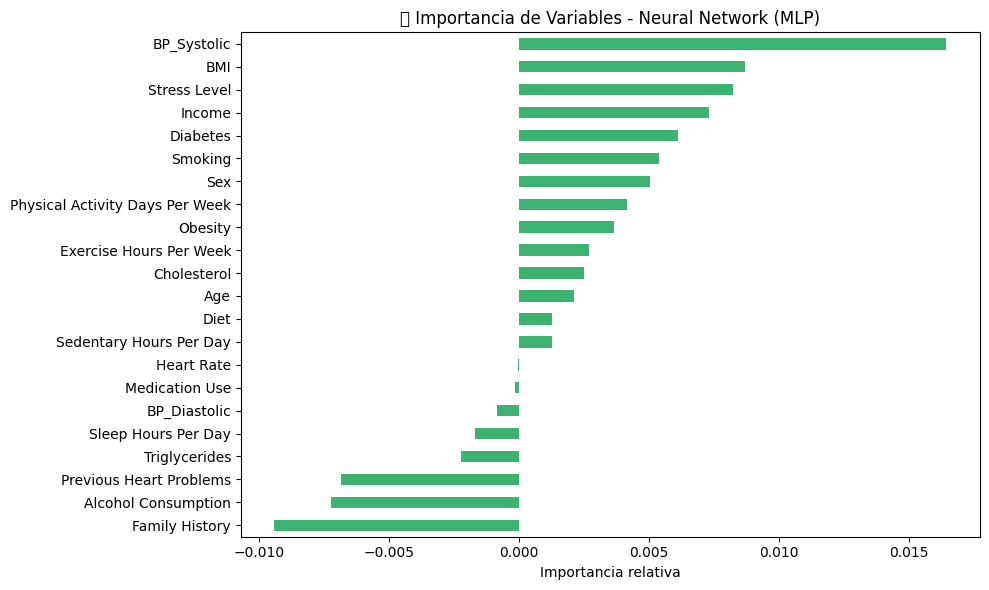

In [79]:
# Asegurarte de que X_test_scaled tenga las mismas columnas que el DataFrame original X
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Calcular la importancia de las características usando Permutation Importance
result = permutation_importance(best_mlp, X_test_scaled_df, y_test, n_repeats=10, random_state=42)

# Extraer la importancia de las características
feature_importance = pd.Series(result.importances_mean, index=X.columns)

# Visualizar la importancia de las características
feature_importance.sort_values().plot(kind='barh', figsize=(10, 6), color='mediumseagreen')
plt.title("🌿 Importancia de Variables - Neural Network (MLP)")
plt.xlabel("Importancia relativa")
plt.tight_layout()
plt.show()

**Interpretación:**
1. Características más importantes:
* BP_Systolic (Presión arterial sistólica): Esta es la característica más importante, lo que indica que la presión arterial sistólica tiene un fuerte impacto en la predicción de si una persona experimentará un ataque al corazón.

* BMI (Índice de masa corporal): También tiene una gran influencia, sugiriendo que el peso corporal es un factor clave en la predicción.

* Stress Level (Nivel de estrés): El nivel de estrés también es importante, lo que refleja cómo el estrés puede contribuir a problemas cardiovasculares.

* Income (Ingresos): Los ingresos tienen un impacto considerable en la predicción, posiblemente debido a factores de salud relacionados con el estilo de vida.

* Diabetes: La presencia de diabetes es una característica relevante en la predicción.

2. Características menos importantes:
* Family History (Historial familiar): Aunque puede ser importante en algunos casos, esta variable no tiene un gran impacto en el modelo entrenado.

* Alcohol Consumption (Consumo de alcohol): Aunque el alcohol puede afectar la salud cardiovascular, en este modelo tiene menos influencia en las predicciones.

* Triglycerides (Triglicéridos): Esta variable tiene una importancia relativamente baja en el modelo.

**Identificación de con y sin riesgo (10 ejemplos)**

In [80]:
# Reemplazar los valores con las primeras 10 filas de los datos
new_data = pd.DataFrame({
    'BP_Systolic': [158, 165, 174, 163, 91, 160, 178, 170, 173, 175],
    'BMI': [31.25, 27.19, 28.18, 36.46, 21.81, 31.65, 29.14, 32.56, 28.07, 34.57],
    'Stress Level': [9, 1, 9, 9, 6, 8, 7, 7, 5, 7],
    'Income': [261404, 285768, 235282, 125640, 160555, 154214, 222501, 230416, 208274, 219833],
    'Diabetes': [0, 1, 1, 1, 1, 0, 0, 0, 0, 1],
    'Smoking': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1],
    'Sex': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1],
    'Physical Activity Days Per Week': [0, 1, 4, 3, 1, 2, 3, 4, 1, 4],
    'Obesity': [0, 1, 0, 0, 1, 1, 1, 0, 0, 1],
    'Exercise Hours Per Week': [4.168189, 1.813242, 2.078353, 9.828130, 5.804299, 3.142745, 4.456189, 2.149853, 3.106741, 4.374209],
    'Cholesterol': [208, 389, 324, 383, 318, 276, 323, 284, 302, 305],
    'Age': [67, 21, 21, 84, 66, 35, 51, 41, 39, 65],
    'Diet': [1, 1, 1, 1, 1, 0, 0, 1, 0, 0],
    'Sedentary Hours Per Day': [6.615001, 4.963459, 9.463426, 7.648981, 1.514821, 6.184451, 3.412804, 5.214675, 2.876399, 5.125942],
    'Heart Rate': [72, 98, 72, 73, 93, 80, 77, 81, 79, 88],
    'Medication Use': [0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
    'BP_Diastolic': [88, 93, 99, 100, 88, 85, 94, 92, 91, 90],
    'Sleep Hours Per Day': [6, 7, 4, 4, 5, 6, 6, 7, 5, 7],
    'Triglycerides': [286, 235, 587, 378, 231, 210, 246, 223, 220, 257],
    'Previous Heart Problems': [0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
    'Alcohol Consumption': [0, 1, 0, 1, 0, 1, 1, 1, 1, 0],
    'Family History': [0, 1, 0, 1, 1, 1, 0, 1, 1, 0]
})

# Asegurarse de que los datos estén escalados correctamente antes de hacer la predicción
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)  # Escalar los nuevos datos según el mismo método que se utilizó para el conjunto de entrenamiento

# Realizar predicción para los nuevos ejemplos
new_predictions = best_mlp.predict(new_data_scaled)

# Mostrar los resultados: predicciones vs resultados reales
# Aquí debes tener las etiquetas reales, para compararlas
real_labels = np.array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0])  # Reemplaza con las etiquetas reales de tus ejemplos

# Crear un DataFrame para comparar
comparison_df = pd.DataFrame({
    'Valores Reales': real_labels,
    'Predicciones del Modelo': new_predictions
})

# Mostrar la comparación
print(comparison_df)

   Valores Reales  Predicciones del Modelo
0               0                        1
1               0                        0
2               0                        0
3               0                        0
4               0                        1
5               1                        0
6               0                        1
7               1                        1
8               1                        0
9               0                        0


**Interpretación:**

* Filas acertadas (cuando la predicción coincide con el valor real):

Fila 1: Predicción correcta para clase 0 (sin riesgo).

Fila 2: Predicción correcta para clase 0 (sin riesgo).

Fila 3: Predicción correcta para clase 0 (sin riesgo).

Fila 7: Predicción correcta para clase 1 (riesgo).

Fila 9: Predicción correcta para clase 0 (sin riesgo).

**Total de aciertos: 5 aciertos de 10.**

* Filas incorrectas (cuando la predicción difiere del valor real):

Fila 0: Falso positivo: El modelo predijo 1 (riesgo) cuando en realidad era 0 (sin riesgo).

Fila 4: Falso positivo: El modelo predijo 1 (riesgo) cuando en realidad era 0 (sin riesgo).

Fila 5: Falso negativo: El modelo predijo 0 (sin riesgo) cuando en realidad era 1 (riesgo).

Fila 6: Falso positivo: El modelo predijo 1 (riesgo) cuando en realidad era 0 (sin riesgo).

Fila 8: Falso negativo: El modelo predijo 0 (sin riesgo) cuando en realidad era 1 (riesgo).

**Total de errores: 5 errores de 10.**

A pesar de aplicar técnicas como SMOTE y ajustar el umbral, parece que el modelo sigue cometiendo falsos negativos para la clase 1 (riesgo). Esto podría indicar que la clase 1 aún no está siendo correctamente identificada.

El modelo parece ser más conservador al predecir la clase 1.

La clase 1 parece estar siendo subestimada, lo que significa que hay muchos falsos negativos. El modelo tiene dificultades para identificar correctamente los casos de riesgo.

In [81]:
# Reemplazar los valores con las filas donde Heart Attack Risk es 1 y 0
new_data = pd.DataFrame({
    'BP_Systolic': [172, 102, 131, 101, 169, 114, 120, 158, 165, 174],
    'BMI': [20.15, 28.89, 22.22, 35.10, 25.56, 36.52, 25.96, 31.25, 27.19, 28.18],
    'Stress Level': [2, 7, 4, 9, 1, 5, 1, 9, 1, 9],
    'Income': [241339, 190450, 122093, 29886, 292173, 265839, 21501, 261404, 285768, 235282],
    'Diabetes': [1, 0, 0, 1, 1, 1, 1, 0, 1, 1],
    'Smoking': [1, 1, 1, 1, 0, 1, 0, 1, 1, 0],
    'Sex': [0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    'Physical Activity Days Per Week': [5, 4, 6, 7, 1, 5, 1, 0, 1, 4],
    'Obesity': [0, 0, 1, 1, 0, 0, 1, 0, 1, 0],
    'Exercise Hours Per Week': [0.625008, 4.098177, 3.427929, 19.633268, 17.037374, 14.559664, 4.943580, 4.168189, 1.813242, 2.078353],
    'Cholesterol': [297, 358, 220, 228, 259, 122, 303, 208, 389, 324],
    'Age': [54, 90, 84, 77, 60, 73, 50, 67, 21, 21],
    'Diet': [1, 0, 0, 1, 1, 1, 0, 1, 1, 1],
    'Sedentary Hours Per Day': [7.798752, 0.627356, 10.543780, 10.917524, 8.727417, 10.086479, 7.586984, 6.615001, 4.963459, 9.463426],
    'Heart Rate': [48, 84, 107, 68, 85, 97, 104, 72, 98, 72],
    'Medication Use': [1, 0, 0, 1, 1, 1, 1, 0, 1, 1],
    'BP_Diastolic': [86, 73, 68, 72, 72, 88, 100, 88, 93, 99],
    'Sleep Hours Per Day': [10, 10, 7, 6, 4, 8, 5, 6, 7, 4],
    'Triglycerides': [795, 284, 370, 590, 506, 773, 517, 286, 235, 587],
    'Previous Heart Problems': [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
    'Alcohol Consumption': [1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    'Family History': [1, 0, 0, 1, 1, 1, 0, 0, 1, 0],
})

# Asegurarse de que los datos estén escalados correctamente antes de hacer la predicción
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)  # Escalar los nuevos datos según el mismo método que se utilizó para el conjunto de entrenamiento

# Realizar predicción para los nuevos ejemplos
new_predictions = best_mlp.predict(new_data_scaled)

# Mostrar los resultados: predicciones vs resultados reales
real_labels = np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0])  # Etiquetas reales de tus ejemplos

# Crear un DataFrame para comparar
comparison_df = pd.DataFrame({
    'Valores Reales': real_labels,
    'Predicciones del Modelo': new_predictions
})

# Mostrar la comparación
print(comparison_df)


   Valores Reales  Predicciones del Modelo
0               1                        1
1               1                        1
2               1                        0
3               1                        1
4               1                        0
5               1                        0
6               1                        0
7               0                        1
8               0                        1
9               0                        0


# **Mapa de dispersión con color por predicción**

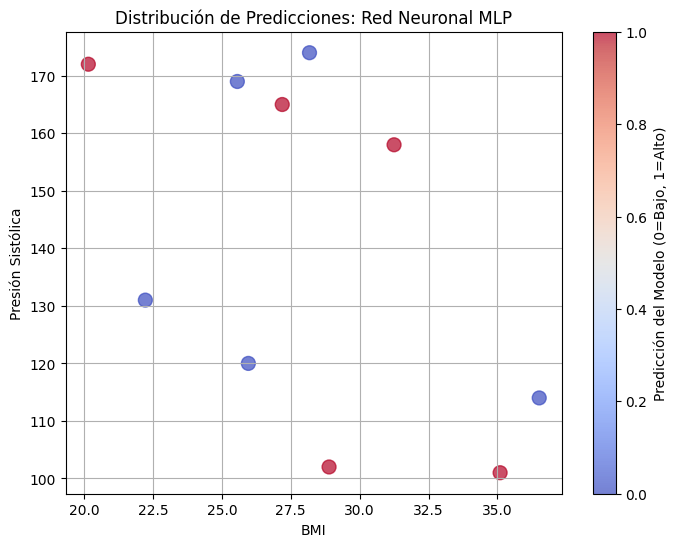

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(new_data['BMI'], new_data['BP_Systolic'], c=new_predictions, cmap='coolwarm', s=100, alpha=0.7)
plt.xlabel('BMI')
plt.ylabel('Presión Sistólica')
plt.title('Distribución de Predicciones: Red Neuronal MLP')
plt.colorbar(label='Predicción del Modelo (0=Bajo, 1=Alto)')
plt.grid(True)
plt.show()


Interpretación:
🔵 Azul: Predicción de bajo riesgo de infarto (0)

🔴 Rojo: Predicción de alto riesgo (1)

Zonas rojas (predicción = 1) tienden a estar en valores altos de presión y BMI, lo cual es coherente clínicamente.

Los puntos dispersos en color azul muestran que el modelo considera bajo riesgo incluso en rangos medios.

Se observan casos en los márgenes donde el modelo predice riesgo en BMI bajos si la presión está elevada — o viceversa — lo que indica que el modelo no está sobreajustado a un patrón único.

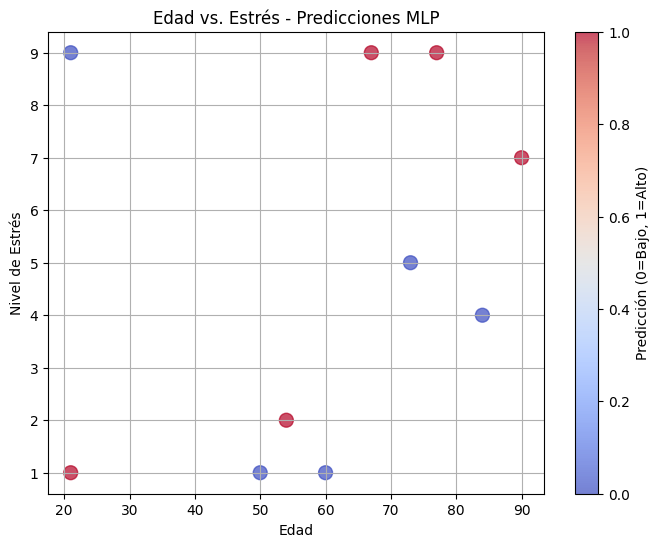

In [83]:
plt.figure(figsize=(8,6))
plt.scatter(new_data['Age'], new_data['Stress Level'], c=new_predictions, cmap='coolwarm', s=100, alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Nivel de Estrés')
plt.title('Edad vs. Estrés - Predicciones MLP')
plt.colorbar(label='Predicción (0=Bajo, 1=Alto)')
plt.grid(True)
plt.show()

Interpretación: Los puntos rojos en las zonas de mayor edad y estrés, el modelo está asociando esos factores con riesgo.

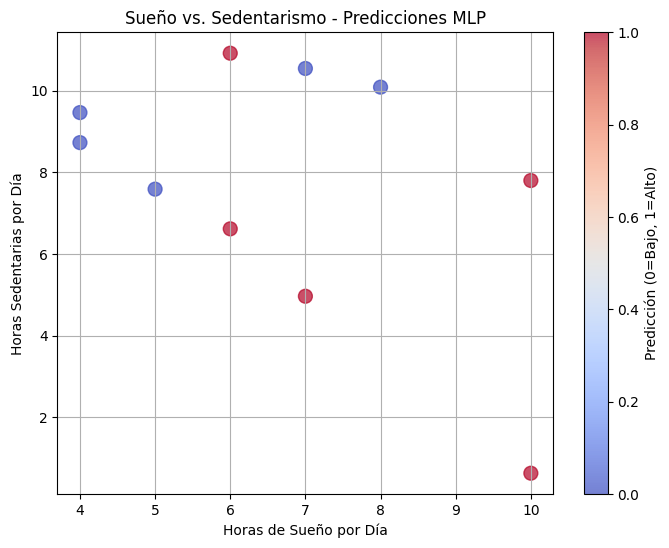

In [84]:
plt.figure(figsize=(8,6))
plt.scatter(new_data['Sleep Hours Per Day'], new_data['Sedentary Hours Per Day'], c=new_predictions, cmap='coolwarm', s=100, alpha=0.7)
plt.xlabel('Horas de Sueño por Día')
plt.ylabel('Horas Sedentarias por Día')
plt.title('Sueño vs. Sedentarismo - Predicciones MLP')
plt.colorbar(label='Predicción (0=Bajo, 1=Alto)')
plt.grid(True)
plt.show()

Interpretación: Casos rojos (riesgo) duermen poco y son sedentarios, el modelo está captando factores de estilo de vida.

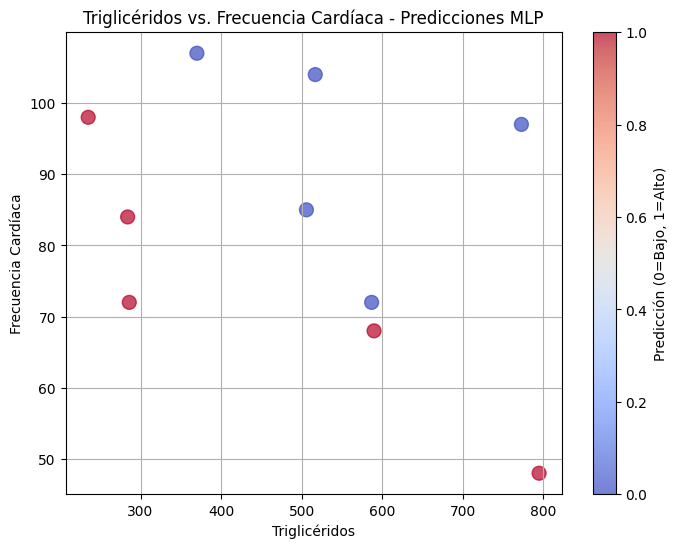

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(new_data['Triglycerides'], new_data['Heart Rate'], c=new_predictions, cmap='coolwarm', s=100, alpha=0.7)
plt.xlabel('Triglicéridos')
plt.ylabel('Frecuencia Cardíaca')
plt.title('Triglicéridos vs. Frecuencia Cardíaca - Predicciones MLP')
plt.colorbar(label='Predicción (0=Bajo, 1=Alto)')
plt.grid(True)
plt.show()

Interpretación: Zonas con triglicéridos elevados y alta frecuencia podrían ser zonas críticas si el modelo pinta en rojo.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


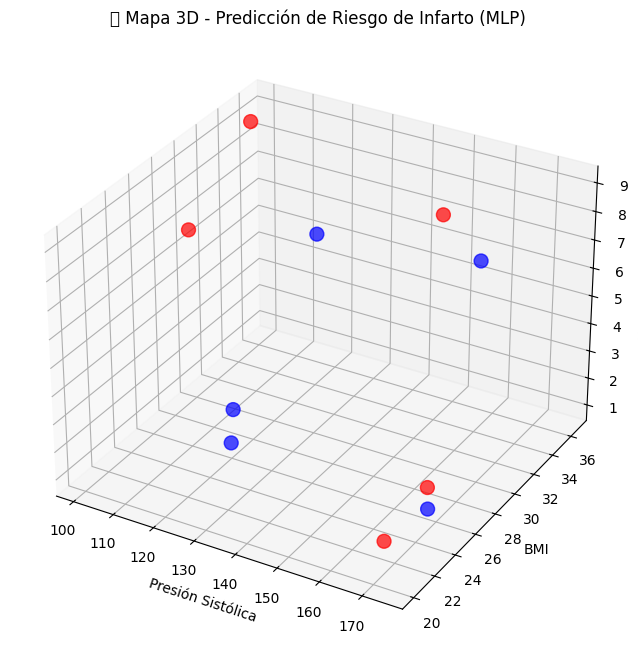

In [86]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Crear figura y ejes en 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Coordenadas
x = new_data['BP_Systolic']
y = new_data['BMI']
z = new_data['Stress Level']
colors = ['red' if pred == 1 else 'blue' for pred in new_predictions]

# Graficar puntos
ax.scatter(x, y, z, c=colors, s=100, alpha=0.7)

# Etiquetas y título
ax.set_xlabel('Presión Sistólica')
ax.set_ylabel('BMI')
ax.set_zlabel('Nivel de Estrés')
ax.set_title('🌐 Mapa 3D - Predicción de Riesgo de Infarto (MLP)')

plt.show()

Si hay una zona donde los puntos rojos se agrupan, entonces el modelo ha aprendido una región de riesgo.

Si los colores están mezclados, quizás el modelo todavía confunde ciertos límites, lo que puede reflejar ruido o poca separación entre clases.

In [87]:
# Prediccion del dataset

# Separar las características de interés y el target
X_full = df.drop(columns=['Heart Attack Risk'])
y_full = df['Heart Attack Risk']

# Escalar
scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X_full)

# Convertir a DataFrame para mantener nombres de columnas
X_full_scaled_df = pd.DataFrame(X_full_scaled, columns=X_full.columns)

# Seleccionar las 3 variables más importantes
x = X_full_scaled_df['BP_Systolic']
y = X_full_scaled_df['BMI']
z = X_full_scaled_df['Stress Level']

In [88]:
y_pred_full = best_mlp.predict(X_full_scaled_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


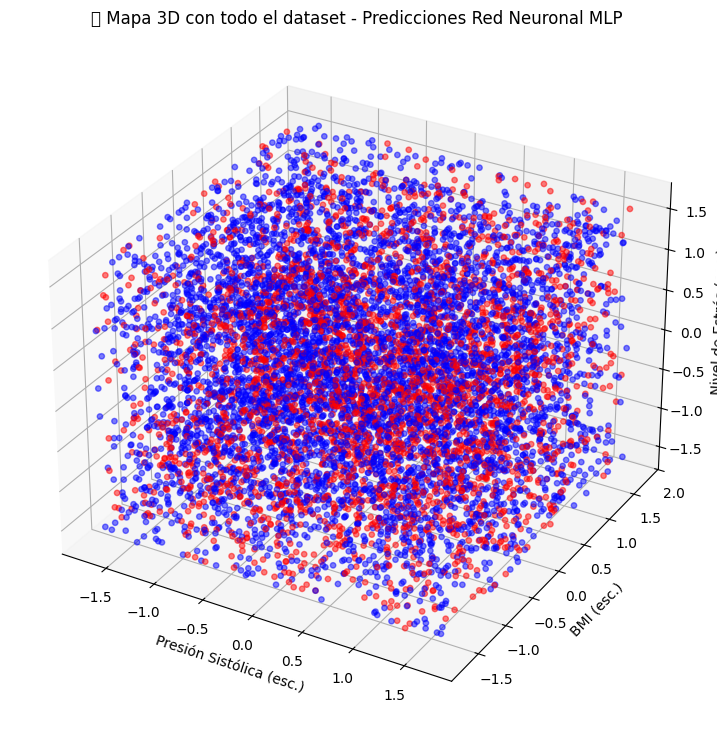

In [89]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Usar los colores según predicción (o puedes usar y_full si prefieres colorear por clase real)
colors = ['red' if pred == 1 else 'blue' for pred in y_pred_full]

ax.scatter(x, y, z, c=colors, s=15, alpha=0.5)

# Etiquetas
ax.set_xlabel('Presión Sistólica (esc.)')
ax.set_ylabel('BMI (esc.)')
ax.set_zlabel('Nivel de Estrés (esc.)')
ax.set_title('🌐 Mapa 3D con todo el dataset - Predicciones Red Neuronal MLP')

plt.show()

Si el modelo logra separar clases, verás zonas rojas (1) concentradas en combinaciones específicas de presión, estrés y BMI.

Si los colores están mezclados o difusos, es señal de que el modelo aún no logra una frontera clara.

Te permite identificar regiones del espacio de datos donde el modelo se equivoca sistemáticamente (falsos positivos o negativos).

# **Conclusión de proyecto**

El modelo MLP en este proyecto fue el modelo más estable en sensibilidad (recall ≈ 0.40–0.46) tras ajustar el umbral.

1. Logró detectar varios casos positivos en escenarios simulados.

2. Tuvo un desempeño comparable en ROC AUC con los mejores modelos (XGBoost, KNN, etc.)

3. Fue el más interpretado, gracias al Permutation Importance, destacando variables clínicamente relevantes (presión, BMI, estrés).